In [1]:
import inspect
import warnings

warnings.filterwarnings("ignore")

import umap
from pmlb import fetch_data  # , classification_dataset_names
from scipy.stats import entropy, mannwhitneyu
# from seaborn import scatterplot
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

pd.options.display.float_format = '{:.6f}'.format

plt.style.use("dark_background")

optimize = optimize_agglo

### This is a battery of tests to see how well various clustering evaluation metrics perform on a variety of datasets.

The datasets are all from the Penn Machine Learning Benchmark.

Each dataset is capped at 2,000 rows (stratified `train_test_split` with `random_state=42`).

The target variable is either binary or categorical.

### Dataset Selection:

All datasets were run through the `optimize_agglo` function with the default parameters.

If the maximum possible Gini-weighted average of Adjusted Mutual Information and Adjusted Rand Index across the grid of distance threshold values were greater than 0.4, the dataset was included in the analysis.

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

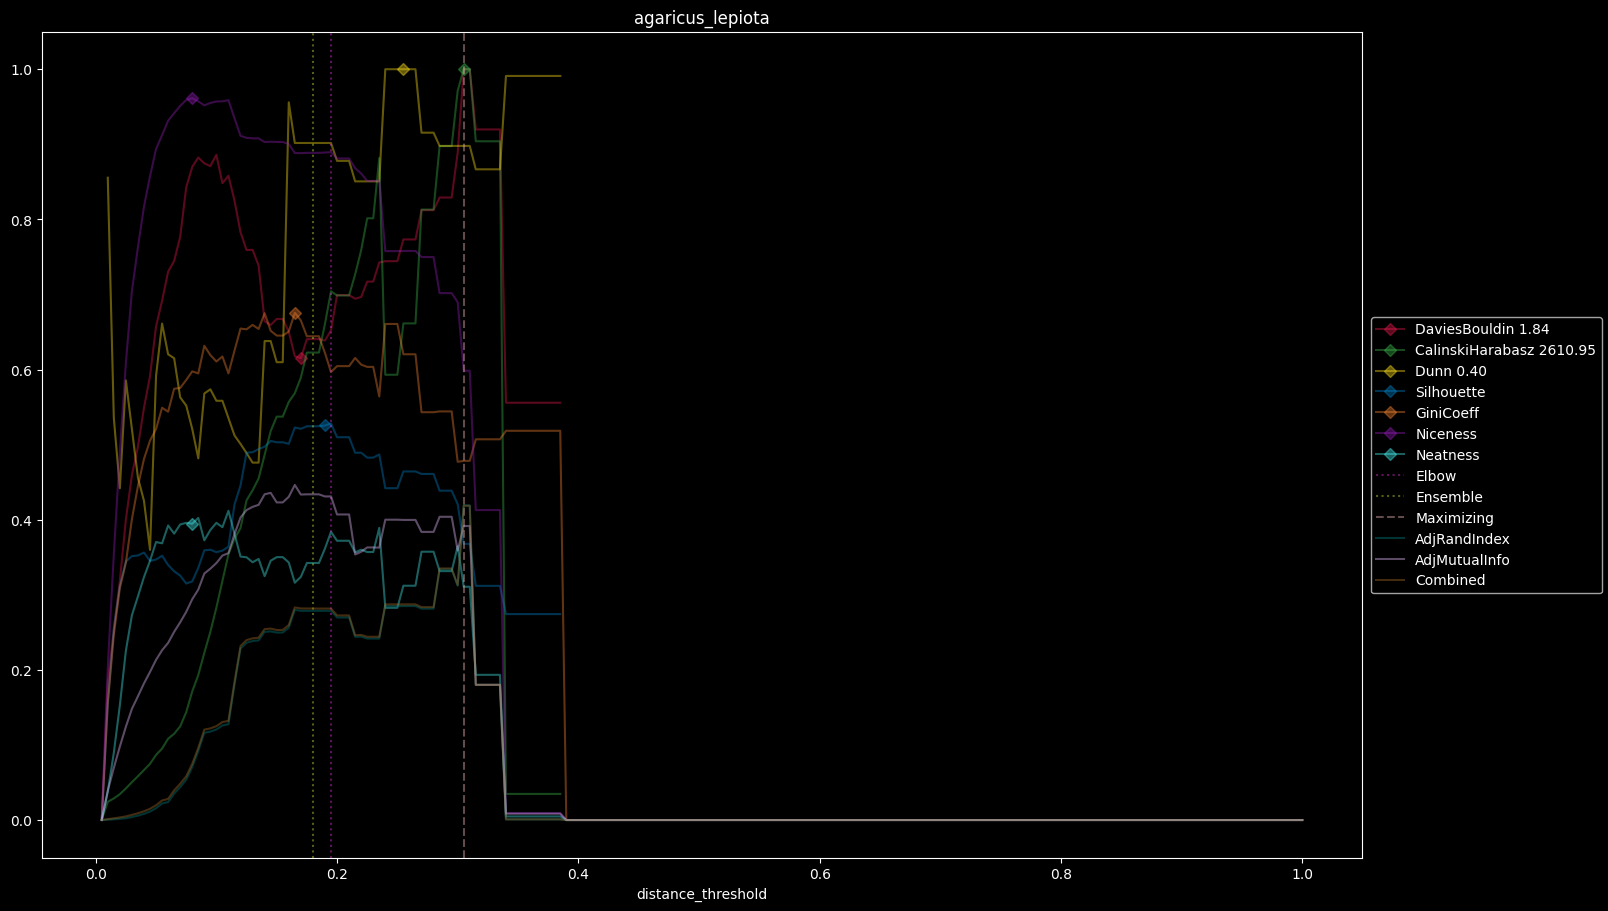

{'Silhouette': 0.3678680053596807, 'Niceness': 0.5983786347219119, 'GiniCoeff': 0.47840618460823064, 'Neatness': 0.3107208976322171, 'sample': {'distance_threshold': 0.305, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {9: 1, 308: 1, 528: 1, 1155: 1}, 'DaviesBouldin': 1.8439702814774224, 'CalinskiHarabasz': 2610.9491757755604, 'Dunn': 0.3570187865097417, 'AdjRandIndex': 0.41909299128398814, 'AdjMutualInfo': 0.3916402087066686, 'Combined': 0.4185472547319396}
0    1038
1     962
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     22.000000
k      2.000000
e      0.692425
g      0.019879
Name: agaricus_lepiota, dtype: float64


  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/841 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

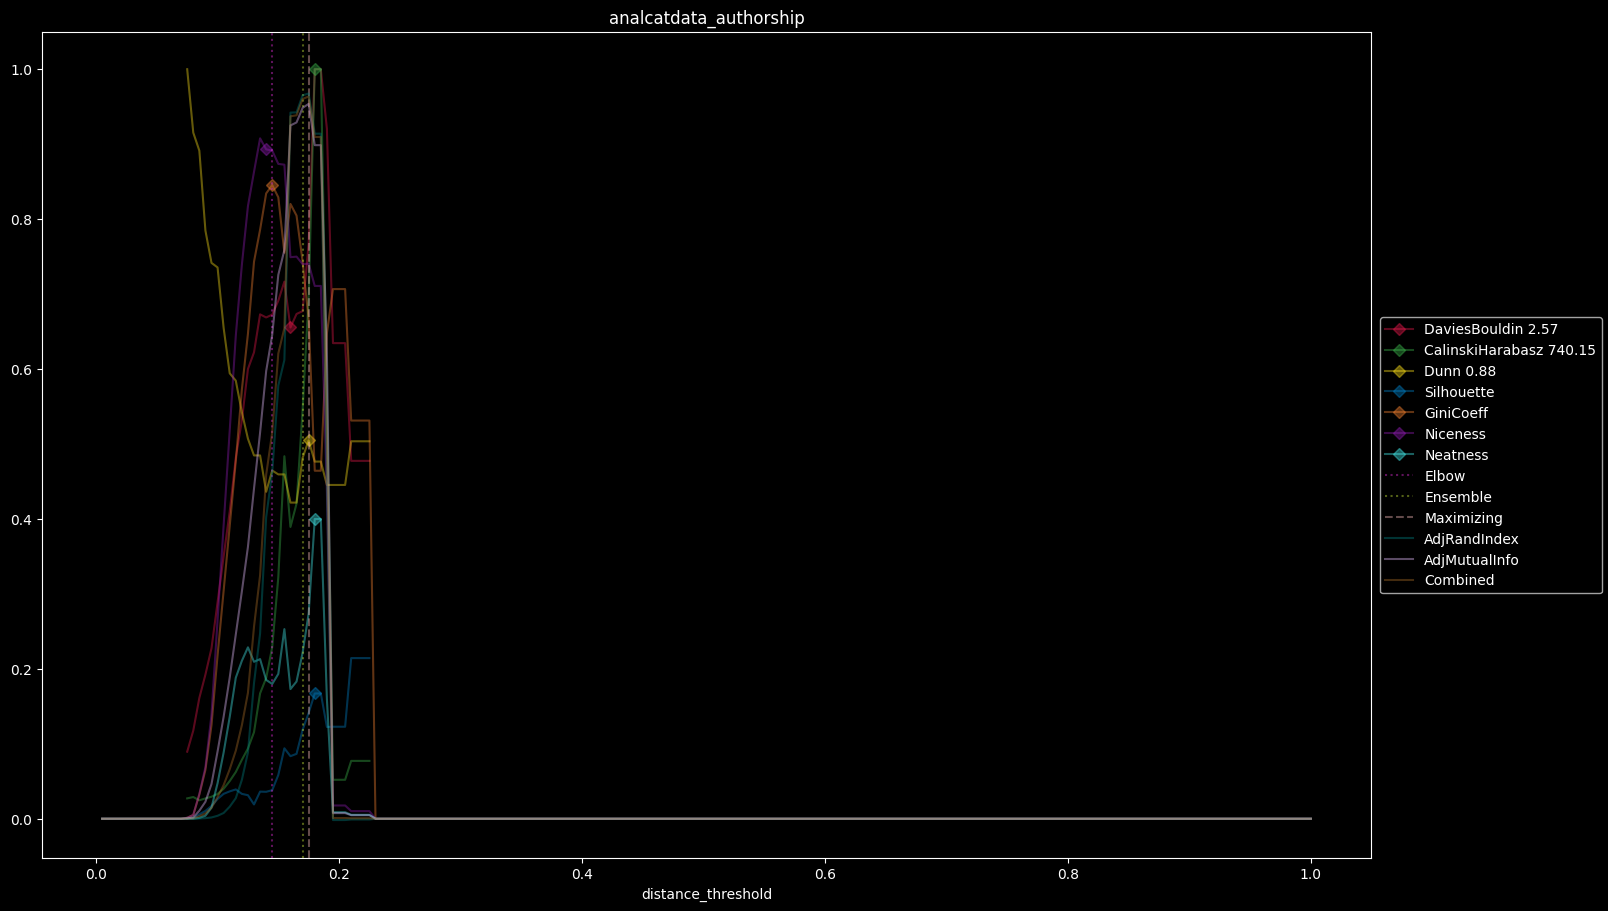

{'Silhouette': 0.141266431462078, 'Niceness': 0.7405702259780766, 'GiniCoeff': 0.665656887755102, 'Neatness': 0.27424024985517165, 'sample': {'distance_threshold': 0.175, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 3: 2, 4: 1, 55: 1, 174: 1, 287: 1, 314: 1}, 'DaviesBouldin': 1.9711972734826262, 'CalinskiHarabasz': 515.380612916275, 'Dunn': 0.44209489504940364, 'AdjRandIndex': 0.9676308175806052, 'AdjMutualInfo': 0.9537722960884977, 'Combined': 0.9636137907833073}
0    317
1    296
3    173
2     55
Name: count, dtype: int64
Dataset Summary
n   841.000000
d    70.000000
k     4.000000
e     1.238942
g     0.289860
Name: analcatdata_authorship, dtype: float64


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/699 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

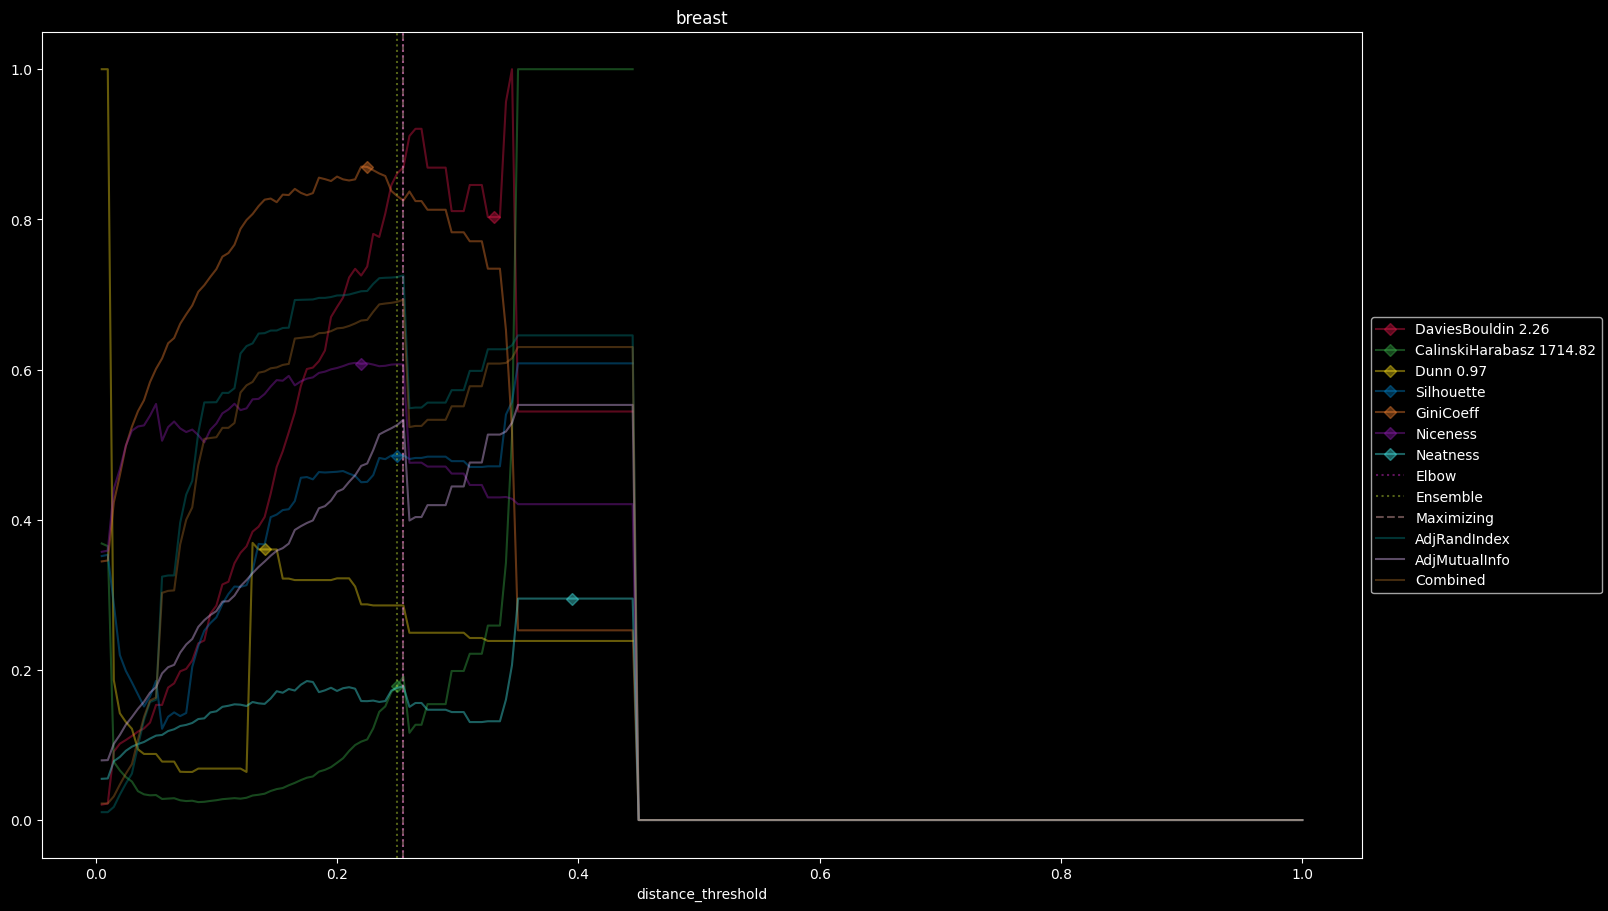

{'Silhouette': 0.4858914858407512, 'Niceness': 0.606714140595063, 'GiniCoeff': 0.8252005943536405, 'Neatness': 0.17809807647149623, 'sample': {'distance_threshold': 0.255, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 1, 4: 3, 7: 1, 10: 1, 14: 1, 19: 1, 27: 1, 28: 1, 63: 1, 69: 1, 444: 1}, 'DaviesBouldin': 1.9655248596307482, 'CalinskiHarabasz': 327.581529010583, 'Dunn': 0.27669751594223757, 'AdjRandIndex': 0.7254323575747712, 'AdjMutualInfo': 0.5330655880233846, 'Combined': 0.6931787672684139}
0    458
1    241
Name: count, dtype: int64
Dataset Summary
n   699.000000
d    10.000000
k     2.000000
e     0.644154
g     0.167667
Name: breast, dtype: float64


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/569 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

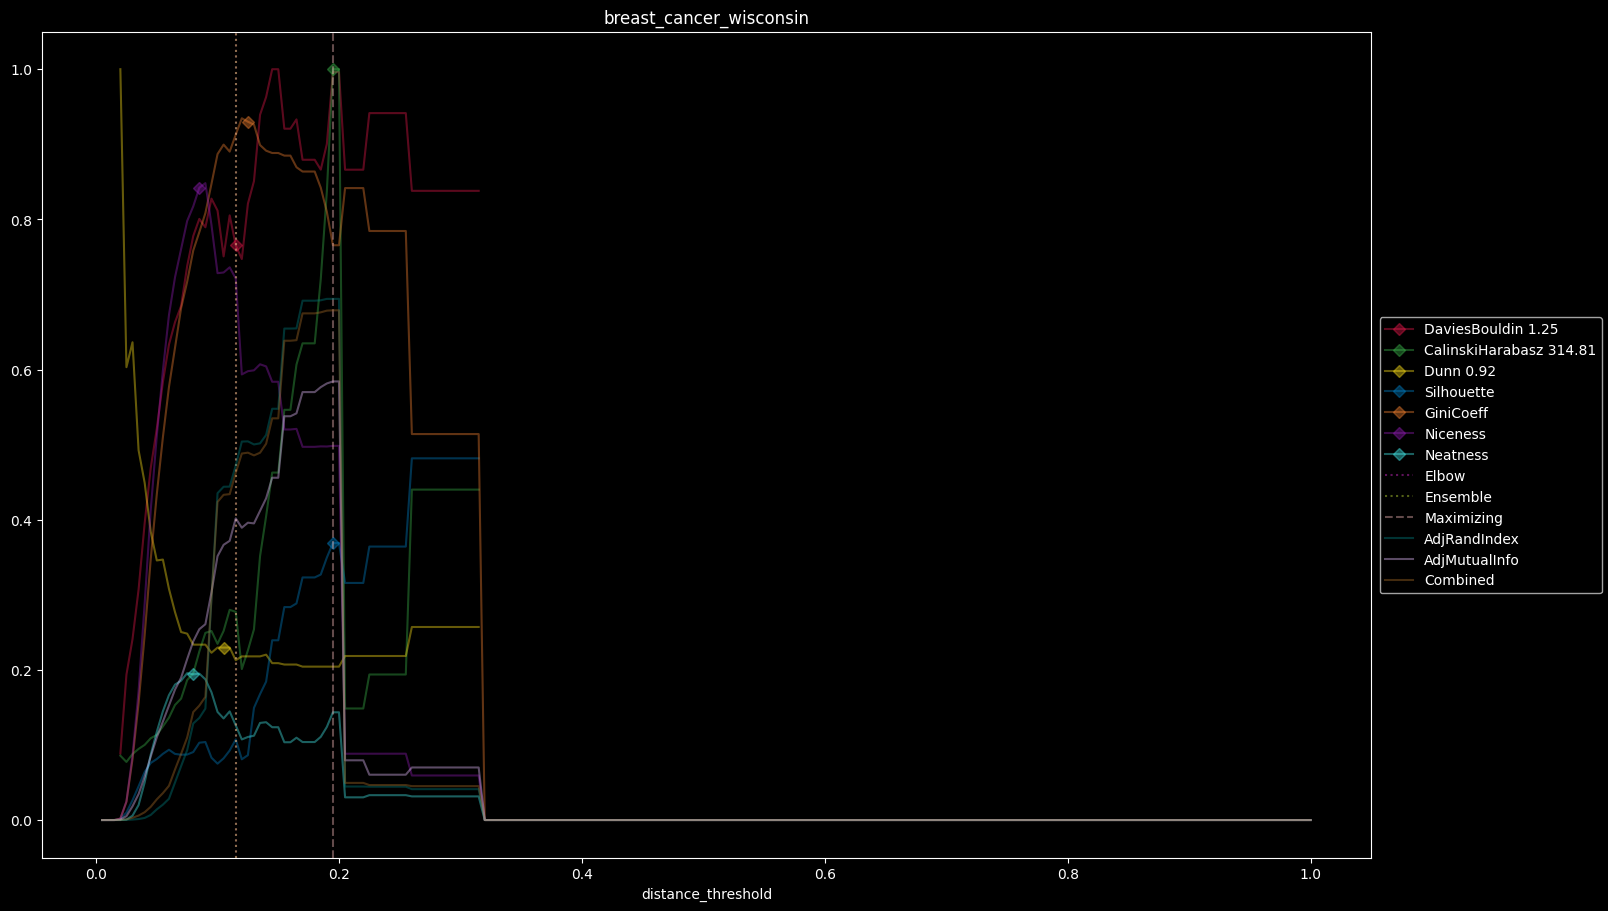

{'Silhouette': 0.3689079924186501, 'Niceness': 0.49835139389421224, 'GiniCoeff': 0.7655364978061427, 'Neatness': 0.14349770323387787, 'sample': {'distance_threshold': 0.195, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 4: 2, 15: 1, 160: 1, 385: 1}, 'DaviesBouldin': 1.2450339208594108, 'CalinskiHarabasz': 314.80553610784114, 'Dunn': 0.18714400725304445, 'AdjRandIndex': 0.6941464166407882, 'AdjMutualInfo': 0.5841595262643937, 'Combined': 0.6788789902941647}
0    357
1    212
Name: count, dtype: int64
Dataset Summary
n   569.000000
d    30.000000
k     2.000000
e     0.660316
g     0.138811
Name: breast_cancer_wisconsin, dtype: float64


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/485 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

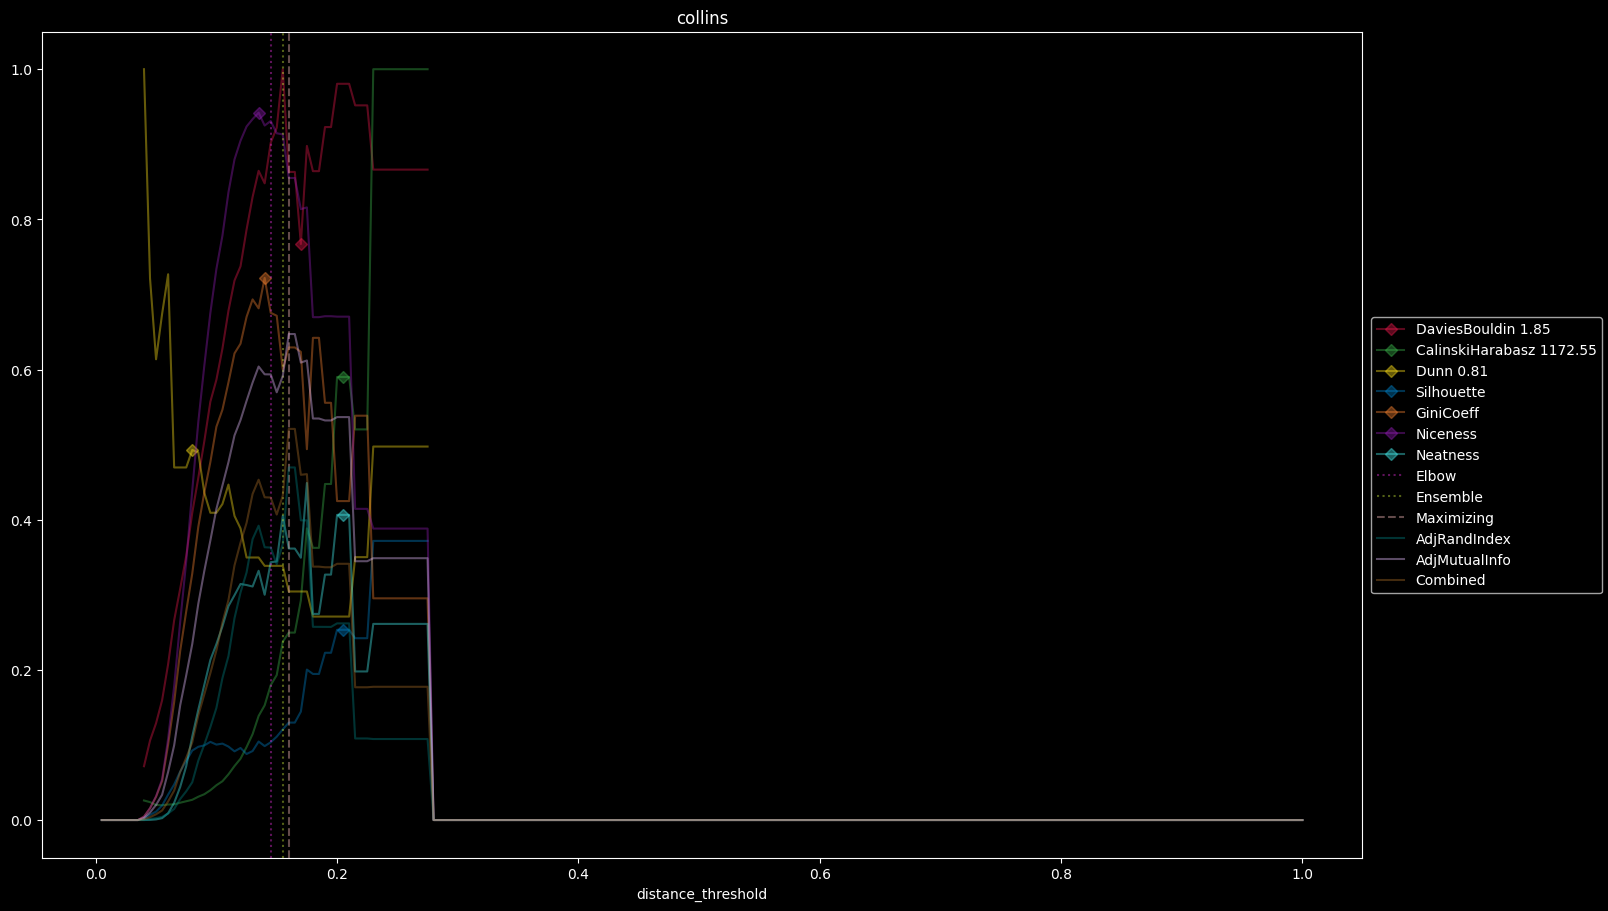

{'Silhouette': 0.1297931609339418, 'Niceness': 0.8551379381712955, 'GiniCoeff': 0.6294353594569577, 'Neatness': 0.3615494418716325, 'sample': {'distance_threshold': 0.16, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 3, 5: 1, 45: 1, 104: 1, 105: 1, 107: 1, 111: 1}, 'DaviesBouldin': 1.6003553698470796, 'CalinskiHarabasz': 292.71326362717093, 'Dunn': 0.24507797237279713, 'AdjRandIndex': 0.46959911743271227, 'AdjMutualInfo': 0.6472800005507138, 'Combined': 0.5209358040478707}
8     80
6     75
5     48
0     44
4     36
7     30
9     29
12    29
13    29
1     27
10    24
2     17
3     17
Name: count, dtype: int64
Dataset Summary
n   485.000000
d    23.000000
k    13.000000
e     2.447482
g     0.288926
Name: collins, dtype: float64


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

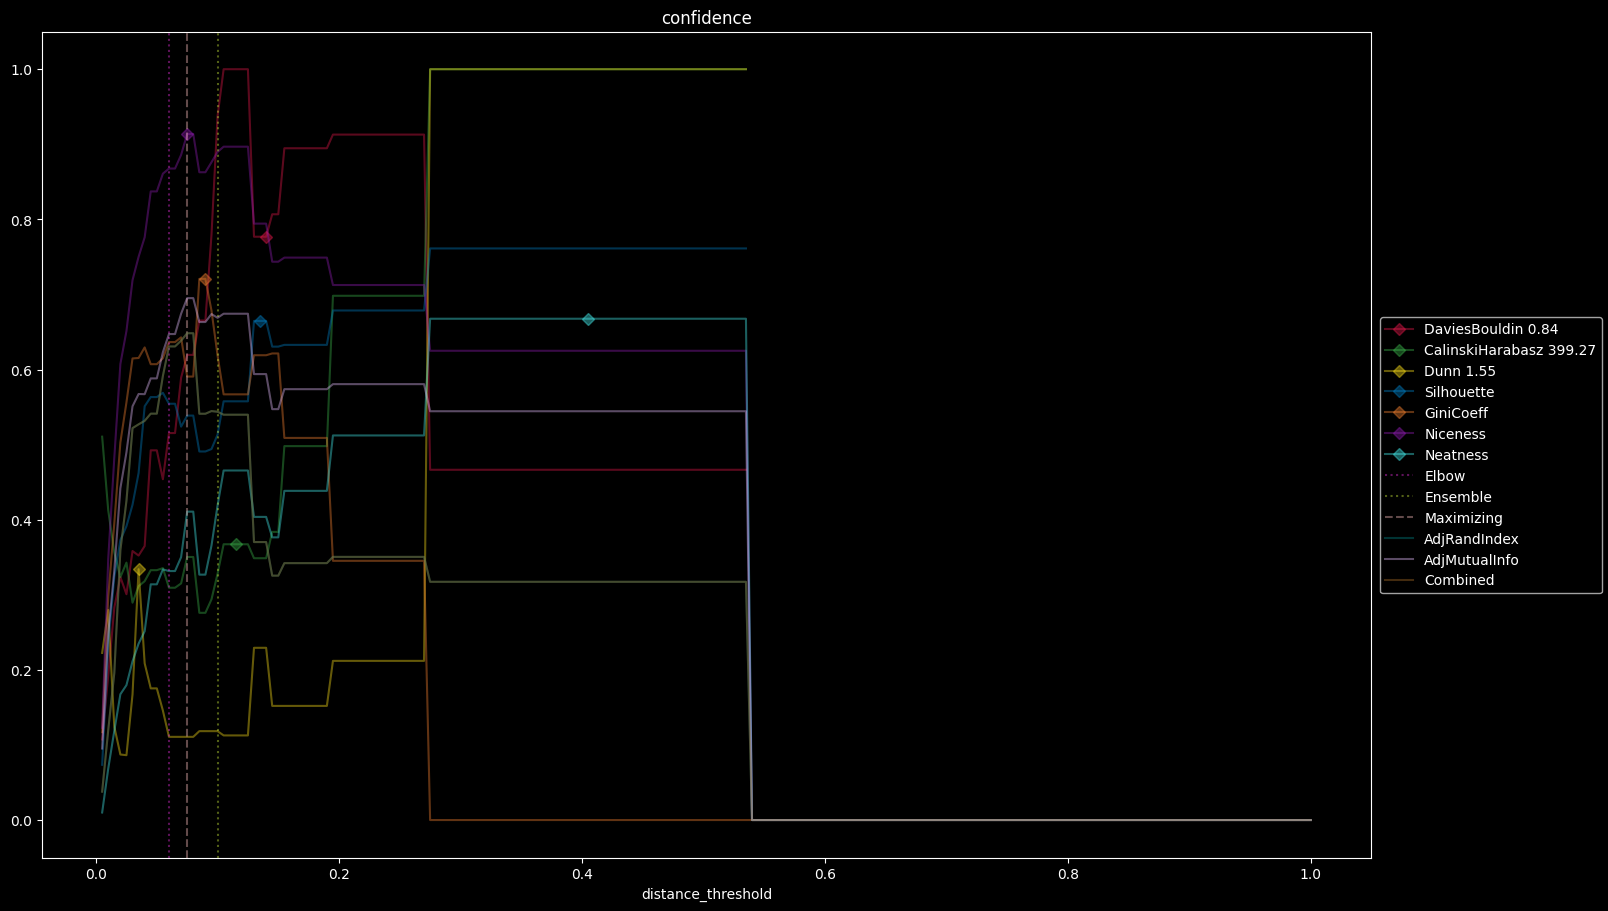

{'Silhouette': 0.5386730561899363, 'Niceness': 0.9137455908289241, 'GiniCoeff': 0.5906593406593407, 'Neatness': 0.4107435035971563, 'sample': {'distance_threshold': 0.075, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 2: 1, 3: 1, 4: 2, 6: 1, 11: 1, 12: 1, 13: 2}, 'DaviesBouldin': 0.5205787181220363, 'CalinskiHarabasz': 139.88495411558281, 'Dunn': 0.17223285578337502, 'AdjRandIndex': 0.6483521570079614, 'AdjMutualInfo': 0.6951089231986718, 'Combined': 0.6483521570079614}
0    12
4    12
2    12
1    12
5    12
3    12
Name: count, dtype: int64
Dataset Summary
n   72.000000
d    3.000000
k    6.000000
e    1.791759
g    0.000000
Name: confidence, dtype: float64


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

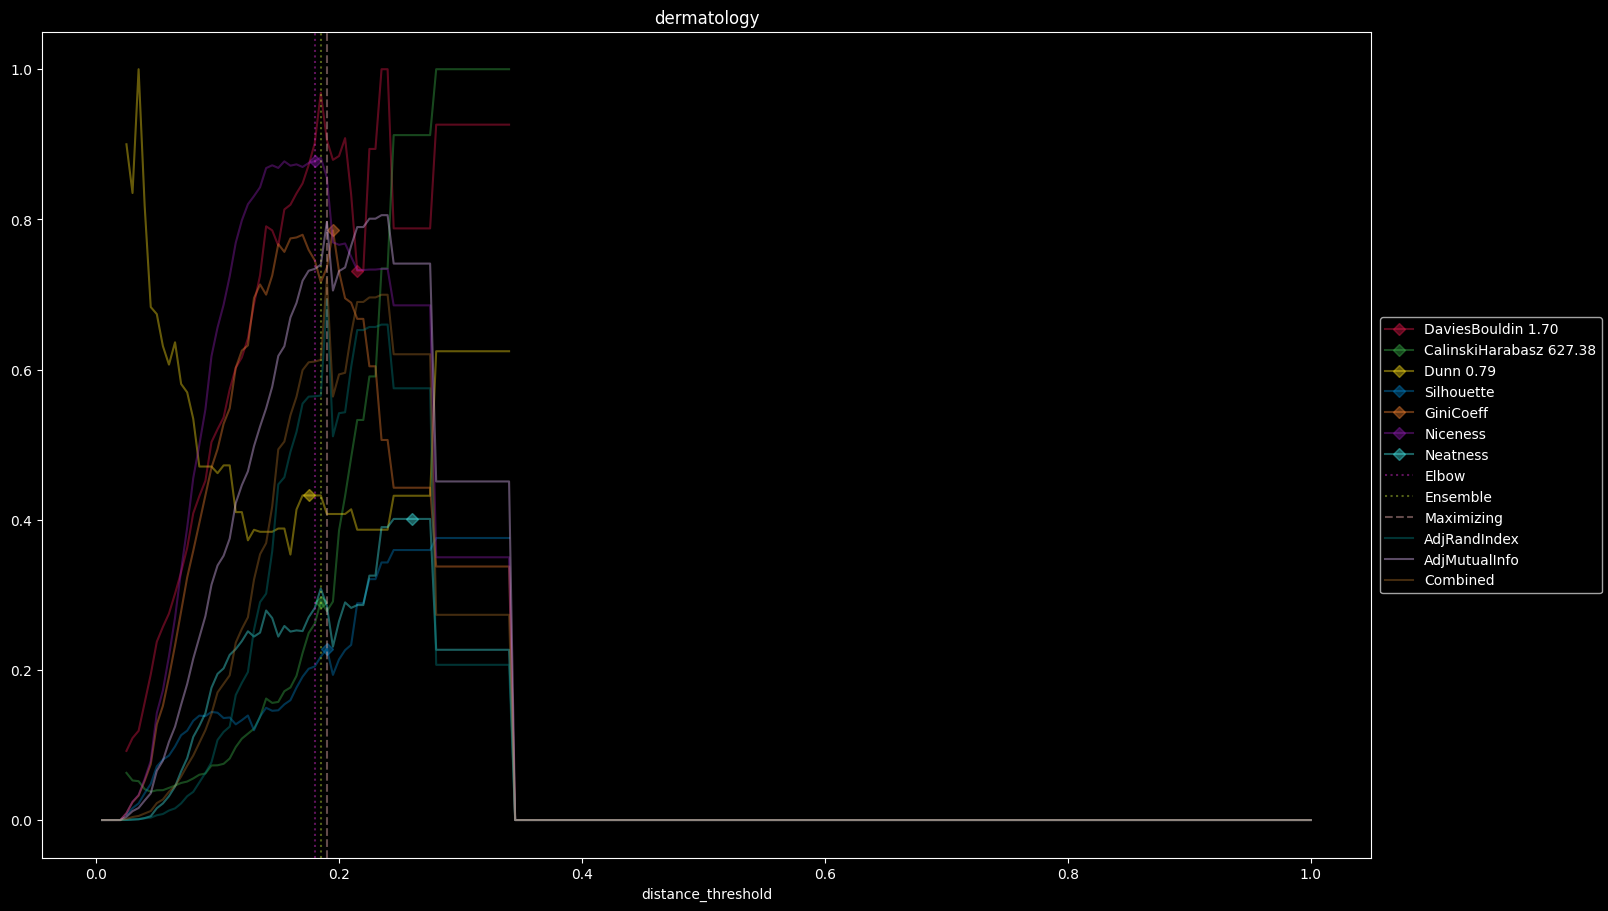

{'Silhouette': 0.22819660440245307, 'Niceness': 0.8556956315243281, 'GiniCoeff': 0.735745543814708, 'Neatness': 0.28510730979280263, 'sample': {'distance_threshold': 0.19, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 2, 3: 1, 4: 1, 6: 1, 7: 1, 9: 2, 10: 1, 51: 1, 70: 1, 80: 1, 111: 1}, 'DaviesBouldin': 1.5366227802077495, 'CalinskiHarabasz': 174.61750623810357, 'Dunn': 0.32157865740385877, 'AdjRandIndex': 0.6931234679028697, 'AdjMutualInfo': 0.7965376419461051, 'Combined': 0.7213308456131363}
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64
Dataset Summary
n   366.000000
d    34.000000
k     6.000000
e     1.686148
g     0.272761
Name: dermatology, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

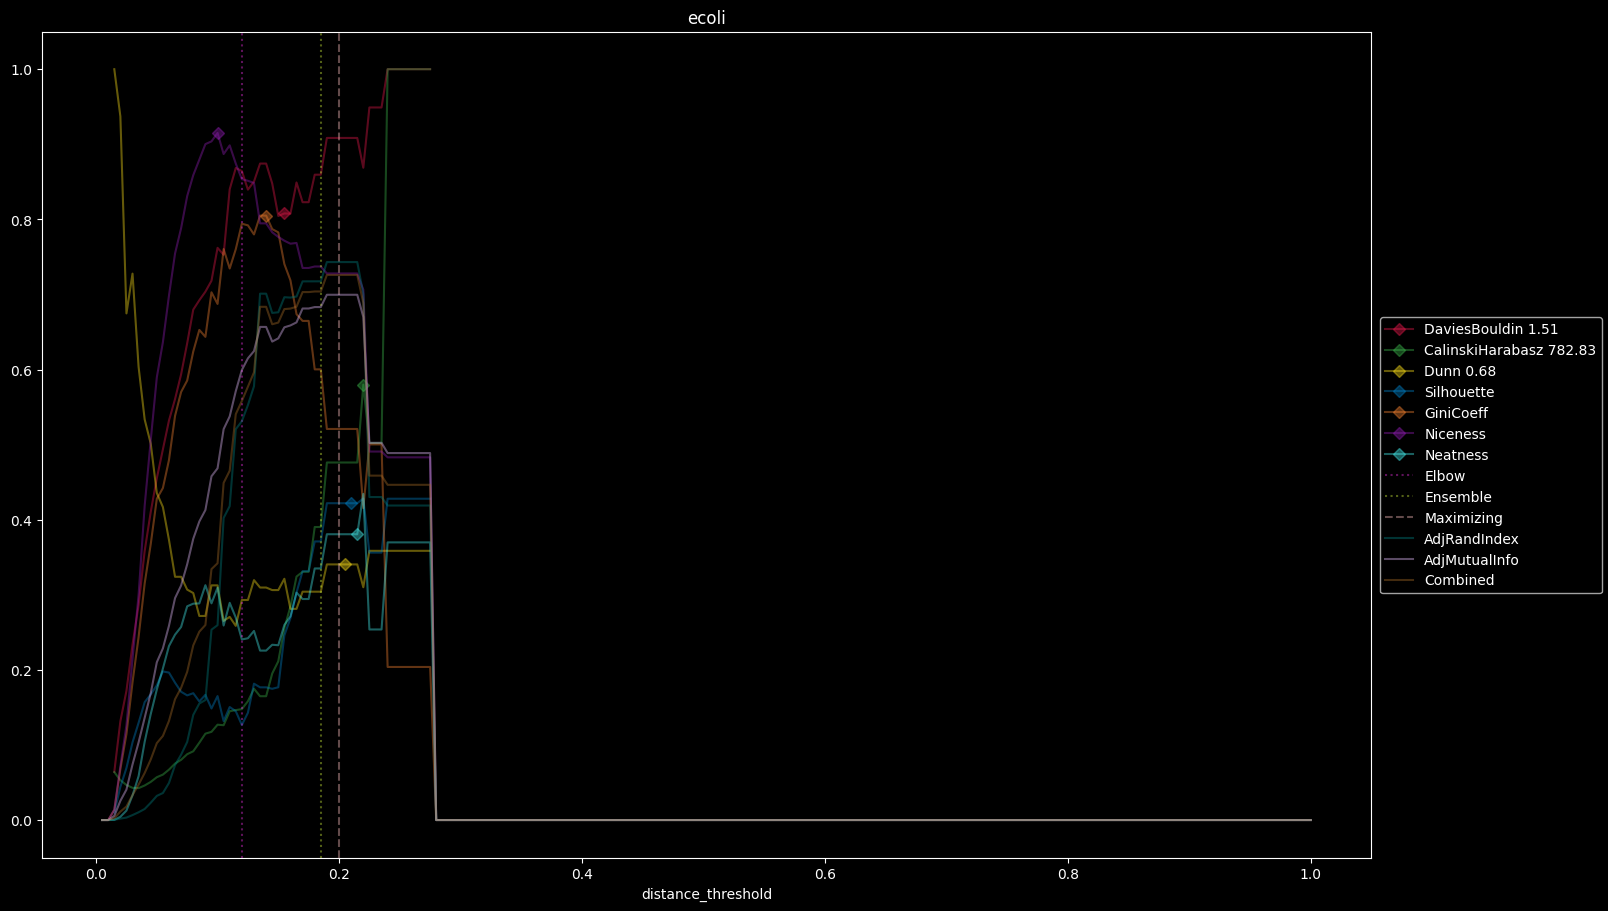

{'Silhouette': 0.4219515007893117, 'Niceness': 0.7279824810860065, 'GiniCoeff': 0.520845231296402, 'Neatness': 0.3806425326804621, 'sample': {'distance_threshold': 0.2, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {2: 1, 8: 1, 69: 1, 104: 1, 144: 1}, 'DaviesBouldin': 1.3719569329244137, 'CalinskiHarabasz': 372.7750429342168, 'Dunn': 0.23169941003424477, 'AdjRandIndex': 0.7431364403991227, 'AdjMutualInfo': 0.6996032526550023, 'Combined': 0.7259518947859097}
0    143
1     77
7     52
4     35
5     20
Name: count, dtype: int64
Dataset Summary
n   327.000000
d     7.000000
k     5.000000
e     1.404712
g     0.394746
Name: ecoli, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

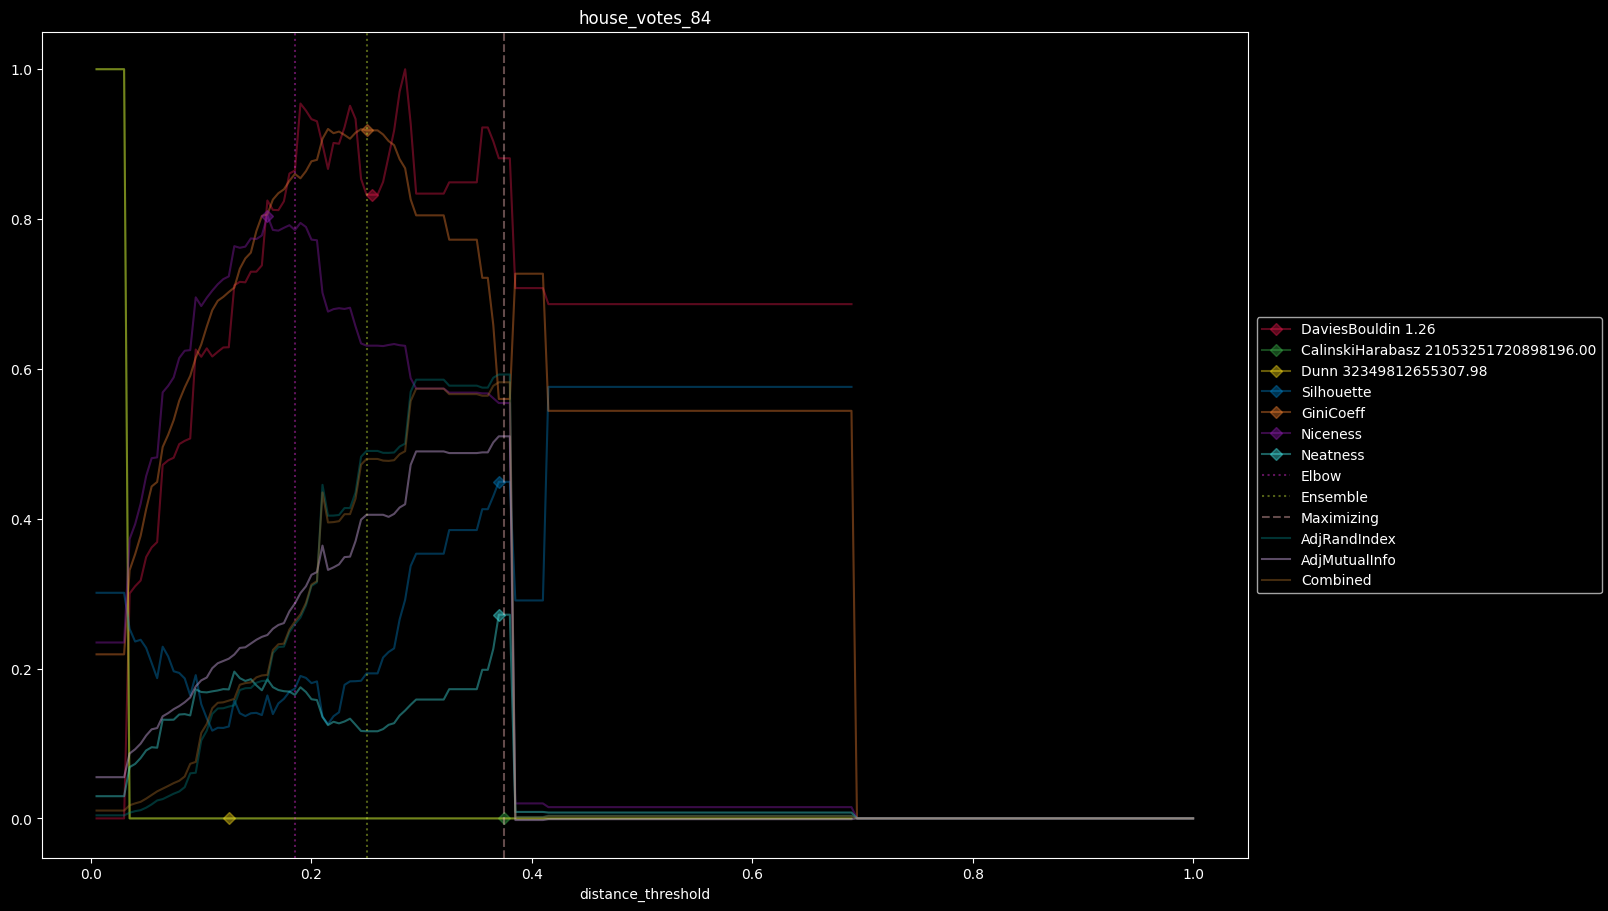

{'Silhouette': 0.4492397508735595, 'Niceness': 0.5544131685336512, 'GiniCoeff': 0.5598731884057971, 'Neatness': 0.2719375603682374, 'sample': {'distance_threshold': 0.375, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 3: 1, 202: 1, 229: 1}, 'DaviesBouldin': 1.106925731808095, 'CalinskiHarabasz': 442.2585019314507, 'Dunn': 0.27163849778099913, 'AdjRandIndex': 0.5924979174356702, 'AdjMutualInfo': 0.5099929442682476, 'Combined': 0.5821399561304121}
0    267
1    168
Name: count, dtype: int64
Dataset Summary
n   435.000000
d    16.000000
k     2.000000
e     0.667021
g     0.125543
Name: house_votes_84, dtype: float64


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

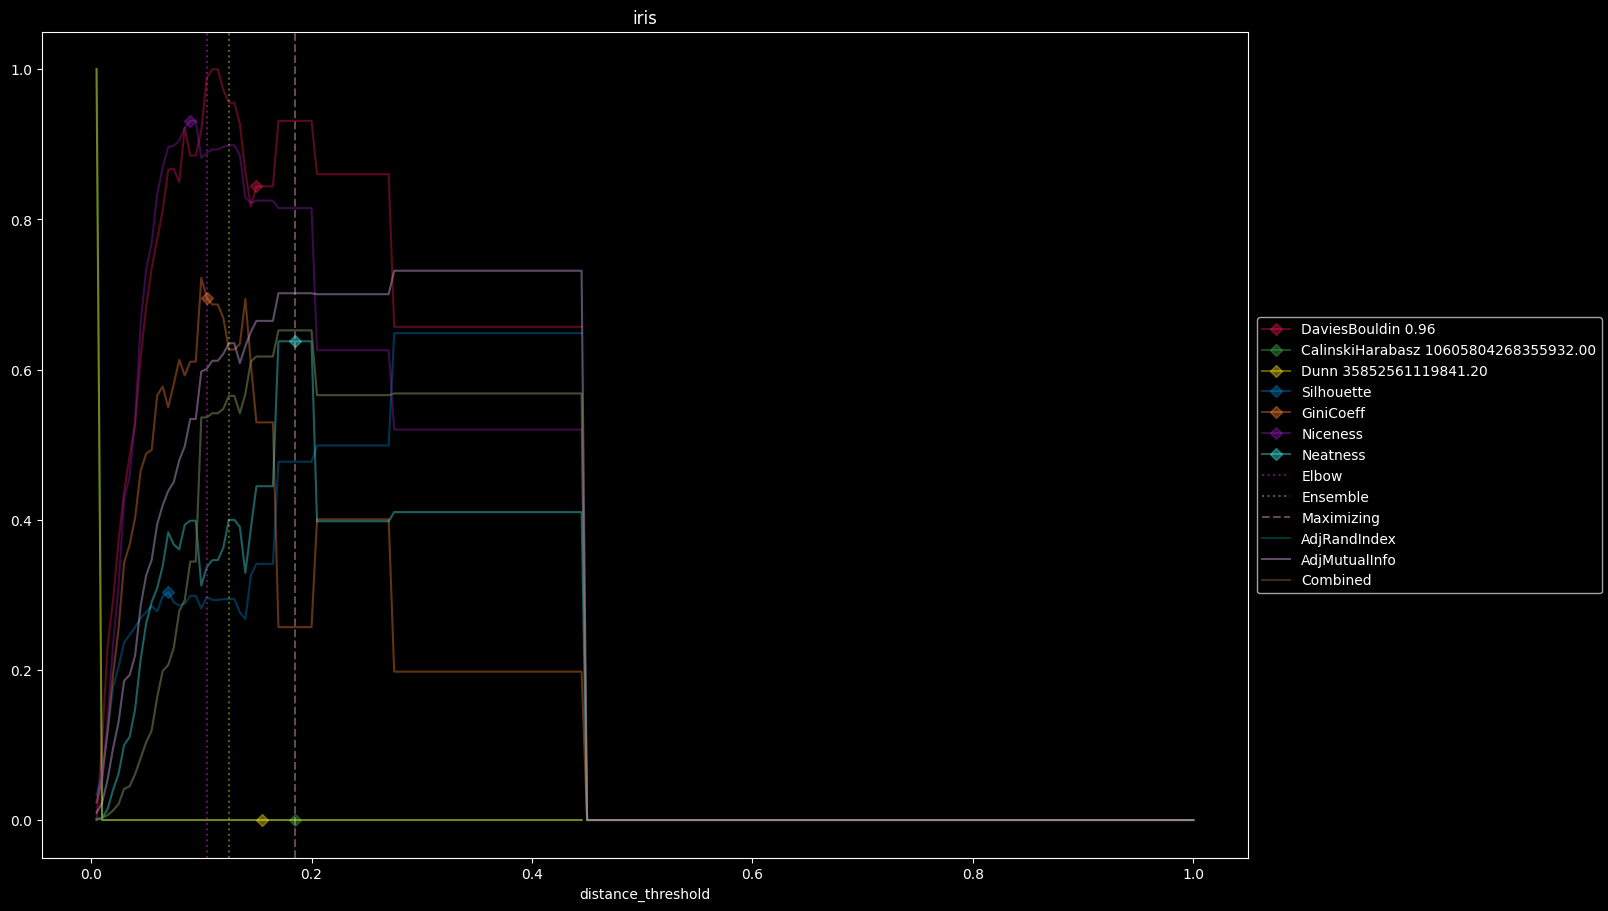

{'Silhouette': 0.47726025597204835, 'Niceness': 0.8149998805271983, 'GiniCoeff': 0.25691699604743085, 'Neatness': 0.6376183780066198, 'sample': {'distance_threshold': 0.185, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {12: 1, 37: 1, 50: 1, 51: 1}, 'DaviesBouldin': 0.897259395549169, 'CalinskiHarabasz': 375.60259226087175, 'Dunn': 0.17073763102706013, 'AdjRandIndex': 0.6521833727068936, 'AdjMutualInfo': 0.7016361903834069, 'Combined': 0.6521833727068936}
2    50
1    50
0    50
Name: count, dtype: int64
Dataset Summary
n   150.000000
d     4.000000
k     3.000000
e     1.098612
g     0.000000
Name: iris, dtype: float64


  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

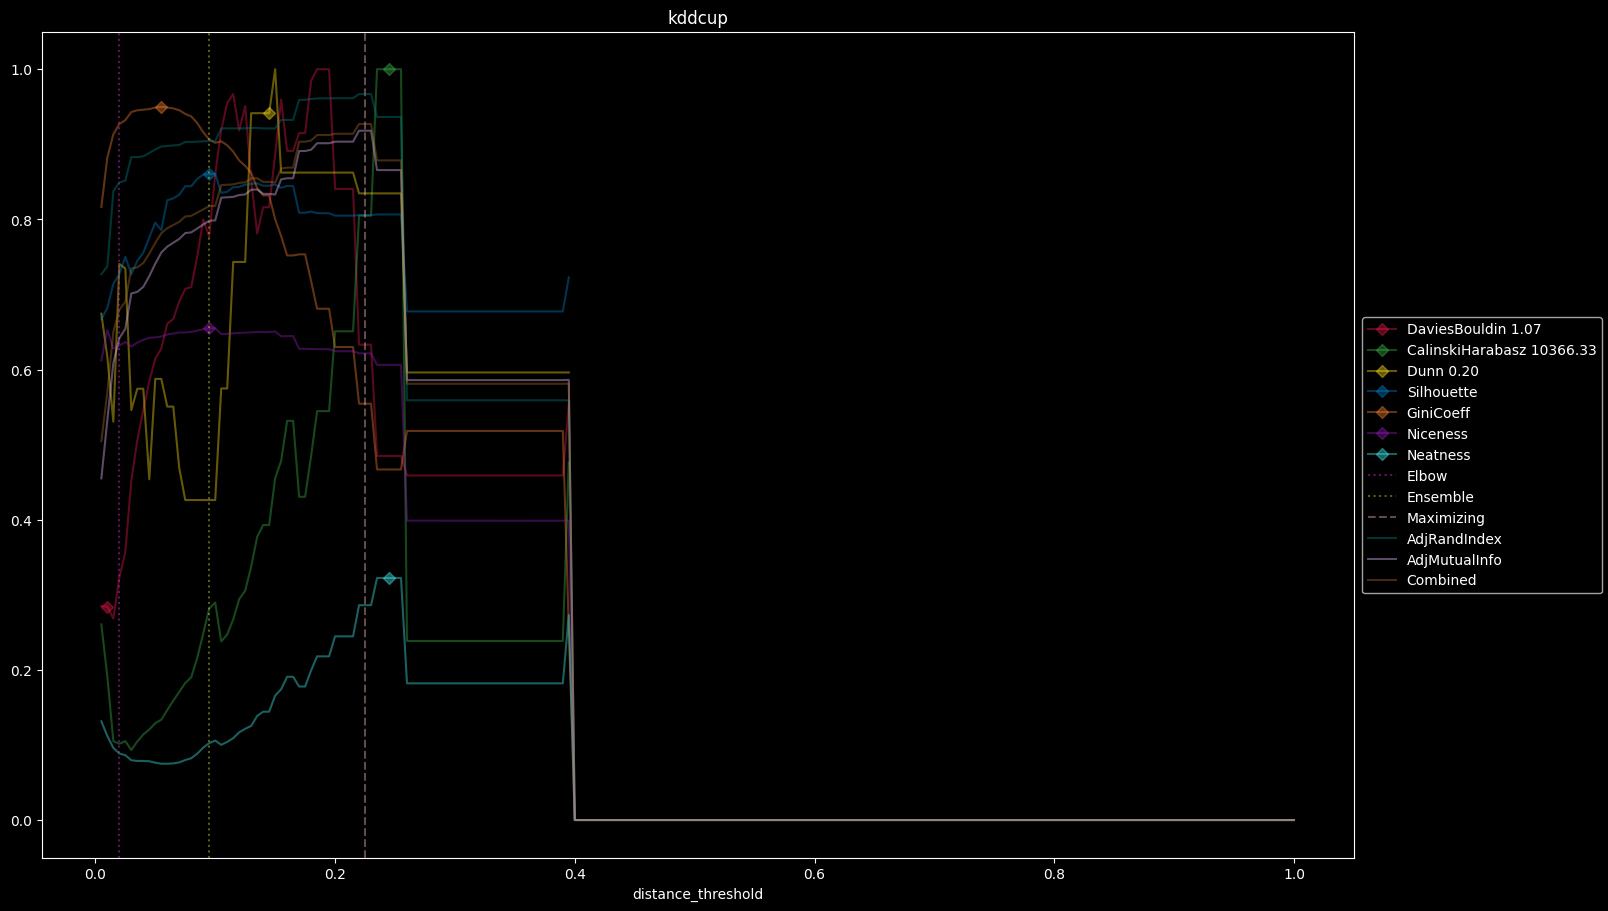

{'Silhouette': 0.8056634751599878, 'Niceness': 0.6215532694963989, 'GiniCoeff': 0.5545222041385724, 'Neatness': 0.28617702033110104, 'sample': {'distance_threshold': 0.225, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 67: 1, 350: 1, 445: 1, 1137: 1}, 'DaviesBouldin': 0.6754219883484328, 'CalinskiHarabasz': 8344.425509468689, 'Dunn': 0.16627420032427906, 'AdjRandIndex': 0.9669292469740022, 'AdjMutualInfo': 0.9180998511609926, 'Combined': 0.9270104340857166}
18    1137
9      434
11     394
0        9
17       7
5        5
15       4
20       4
21       4
10       1
14       1
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     41.000000
k     11.000000
e      1.076621
g      0.817516
Name: kddcup, dtype: float64


  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

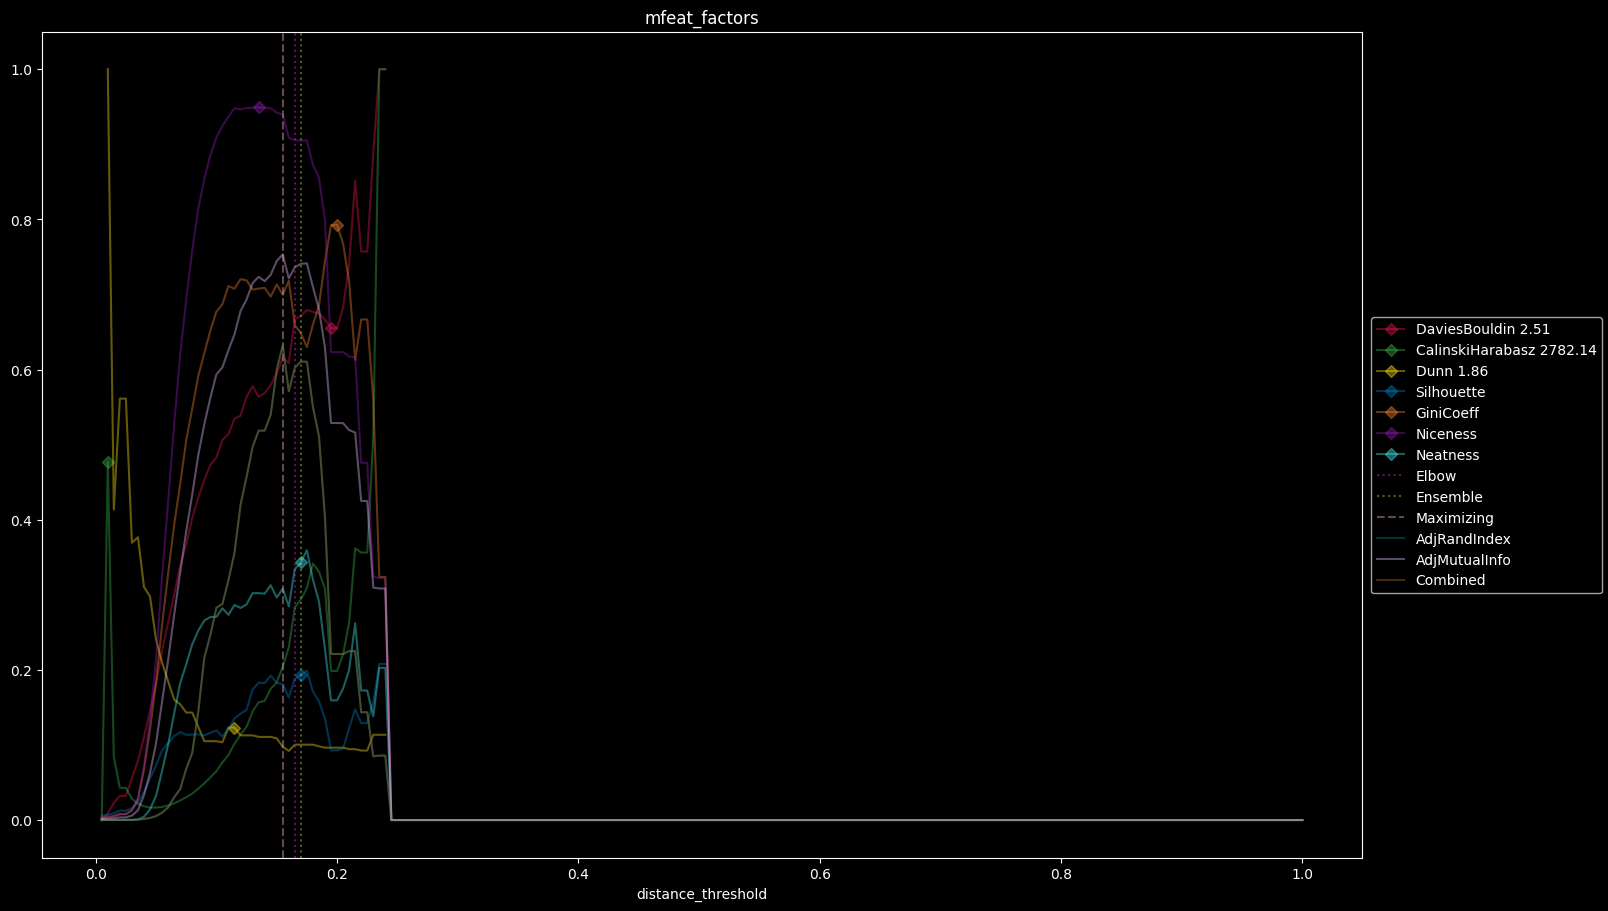

{'Silhouette': 0.1810096590645446, 'Niceness': 0.9394864272784895, 'GiniCoeff': 0.6996246720031887, 'Neatness': 0.3081238527435939, 'sample': {'distance_threshold': 0.155, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 7, 2: 3, 3: 1, 6: 1, 7: 1, 11: 1, 13: 2, 14: 2, 15: 1, 20: 1, 24: 1, 33: 1, 43: 1, 63: 1, 64: 1, 86: 1, 103: 1, 113: 1, 117: 1, 131: 1, 148: 1, 186: 1, 191: 1, 199: 1, 370: 1}, 'DaviesBouldin': 1.5441883437740778, 'CalinskiHarabasz': 567.9258073115014, 'Dunn': 0.18146352675680869, 'AdjRandIndex': 0.6324298046135716, 'AdjMutualInfo': 0.7532361033934265, 'Combined': 0.6324298046135716}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    216.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_factors, dtype: float64


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

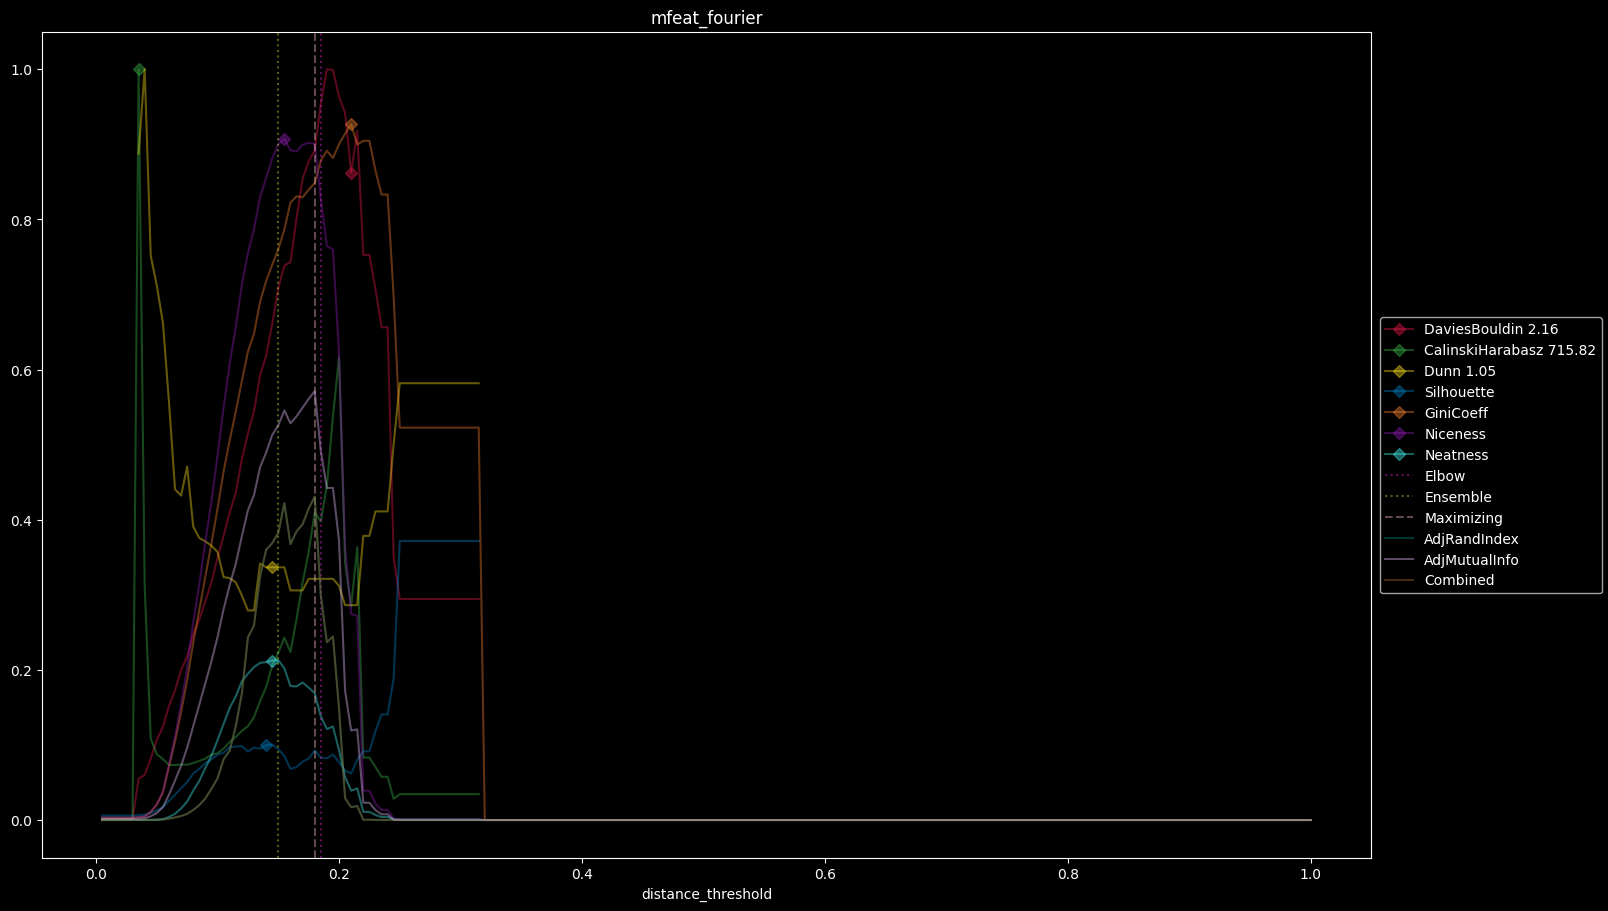

{'Silhouette': 0.09284618785681238, 'Niceness': 0.9006452381153228, 'GiniCoeff': 0.84833044193658, 'Neatness': 0.16899649168841435, 'sample': {'distance_threshold': 0.18, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 16, 2: 7, 3: 11, 4: 5, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1, 14: 1, 16: 2, 19: 1, 22: 1, 25: 1, 27: 1, 32: 1, 33: 1, 40: 1, 48: 1, 63: 1, 107: 1, 130: 1, 136: 1, 150: 1, 184: 1, 378: 1, 426: 1}, 'DaviesBouldin': 1.9237419286639017, 'CalinskiHarabasz': 293.2263828868991, 'Dunn': 0.33640916821717337, 'AdjRandIndex': 0.43072956983476707, 'AdjMutualInfo': 0.5711424253386754, 'Combined': 0.43072956983476707}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     76.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_fourier, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

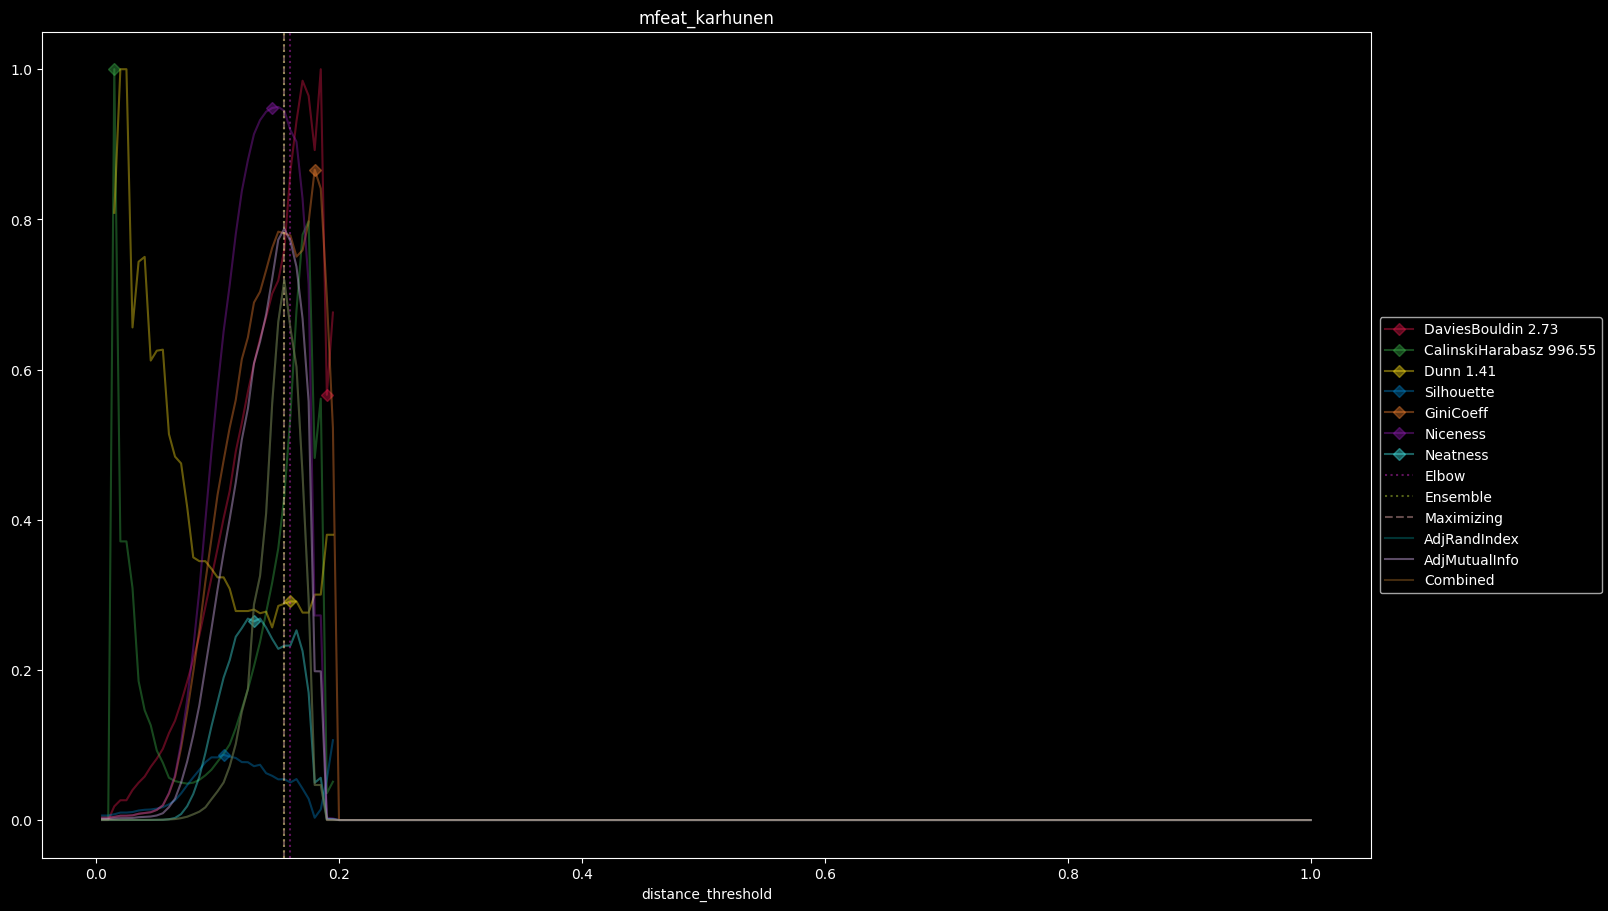

{'Silhouette': 0.05440363752306872, 'Niceness': 0.9444770149566442, 'GiniCoeff': 0.7814129604410934, 'Neatness': 0.23221080951596615, 'sample': {'distance_threshold': 0.155, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 14, 2: 9, 3: 3, 4: 3, 6: 1, 7: 1, 8: 1, 9: 1, 10: 2, 12: 1, 13: 1, 18: 1, 21: 1, 24: 2, 26: 1, 28: 1, 38: 1, 45: 2, 83: 1, 109: 1, 130: 1, 153: 1, 160: 1, 167: 1, 179: 1, 182: 1, 199: 1, 241: 1}, 'DaviesBouldin': 2.071545008524435, 'CalinskiHarabasz': 430.42138056236405, 'Dunn': 0.40678678379742766, 'AdjRandIndex': 0.7190970979343196, 'AdjMutualInfo': 0.7875633772078564, 'Combined': 0.7190970979343196}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_karhunen, dtype: float64


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

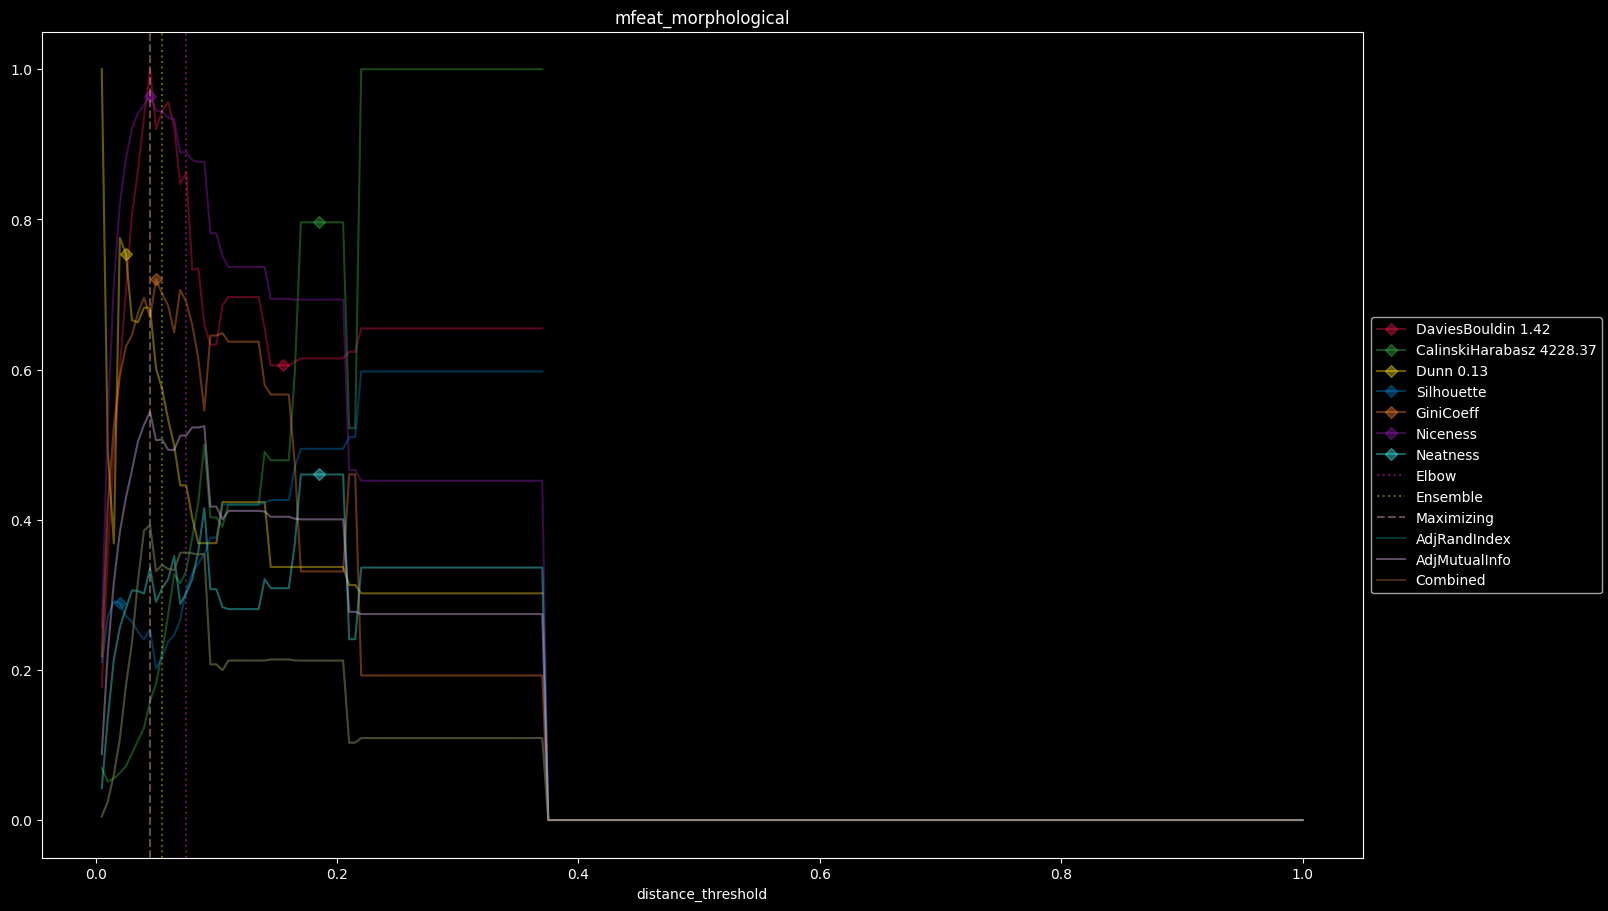

{'Silhouette': 0.2539570140295604, 'Niceness': 0.9639102265236178, 'GiniCoeff': 0.6693394017956958, 'Neatness': 0.335326824872263, 'sample': {'distance_threshold': 0.045, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 10, 2: 4, 3: 7, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 4, 10: 2, 12: 2, 13: 1, 14: 1, 20: 1, 21: 1, 24: 2, 28: 2, 30: 1, 31: 1, 32: 1, 33: 1, 35: 1, 38: 1, 42: 1, 43: 2, 46: 2, 50: 1, 51: 1, 59: 1, 60: 1, 61: 1, 67: 1, 70: 1, 72: 1, 75: 1, 81: 1, 170: 1, 195: 1, 210: 1}, 'DaviesBouldin': 1.422948042531105, 'CalinskiHarabasz': 668.7898317536003, 'Dunn': 0.09127348533245601, 'AdjRandIndex': 0.3927197869882485, 'AdjMutualInfo': 0.5434276020406054, 'Combined': 0.3927197869882485}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d      6.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_morphological, dtype: float64


  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

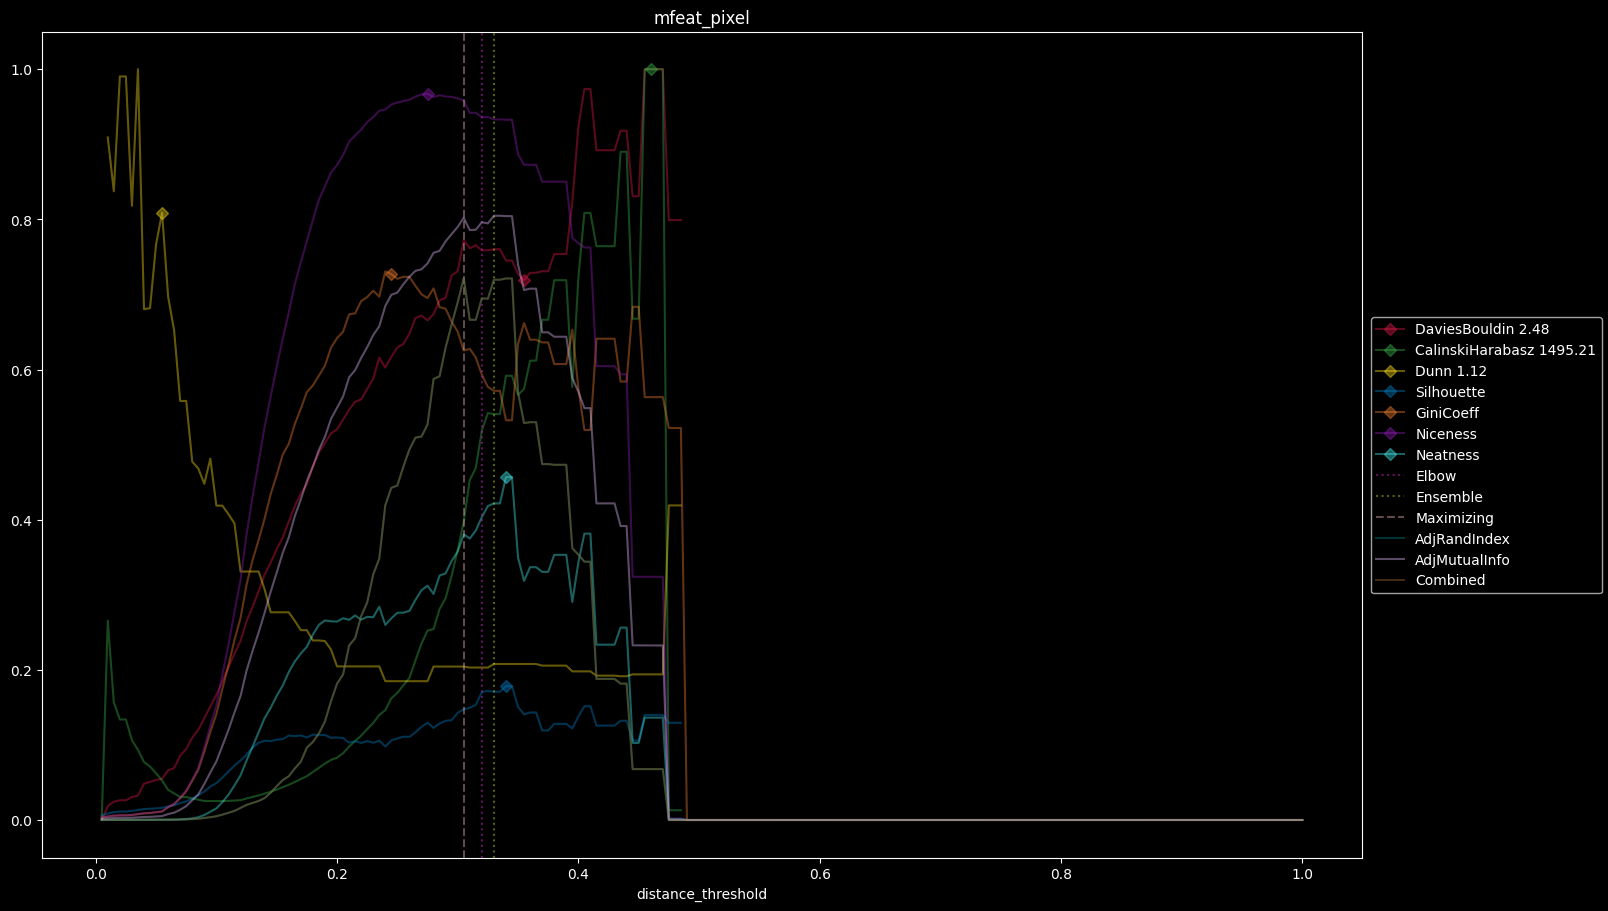

{'Silhouette': 0.14742684156626013, 'Niceness': 0.9581620309328797, 'GiniCoeff': 0.6252376328350452, 'Neatness': 0.3806155445693747, 'sample': {'distance_threshold': 0.305, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 5, 3: 1, 7: 1, 9: 1, 10: 3, 11: 1, 12: 2, 14: 1, 17: 1, 19: 2, 20: 1, 25: 1, 35: 1, 55: 1, 80: 1, 83: 1, 91: 1, 97: 1, 116: 1, 155: 1, 161: 1, 166: 1, 171: 1, 191: 2, 205: 1}, 'DaviesBouldin': 1.9136236277989858, 'CalinskiHarabasz': 594.4562239746728, 'Dunn': 0.2298377699682603, 'AdjRandIndex': 0.7216970697978945, 'AdjMutualInfo': 0.8021877628329735, 'Combined': 0.7216970697978945}
0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d    240.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_pixel, dtype: float64


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

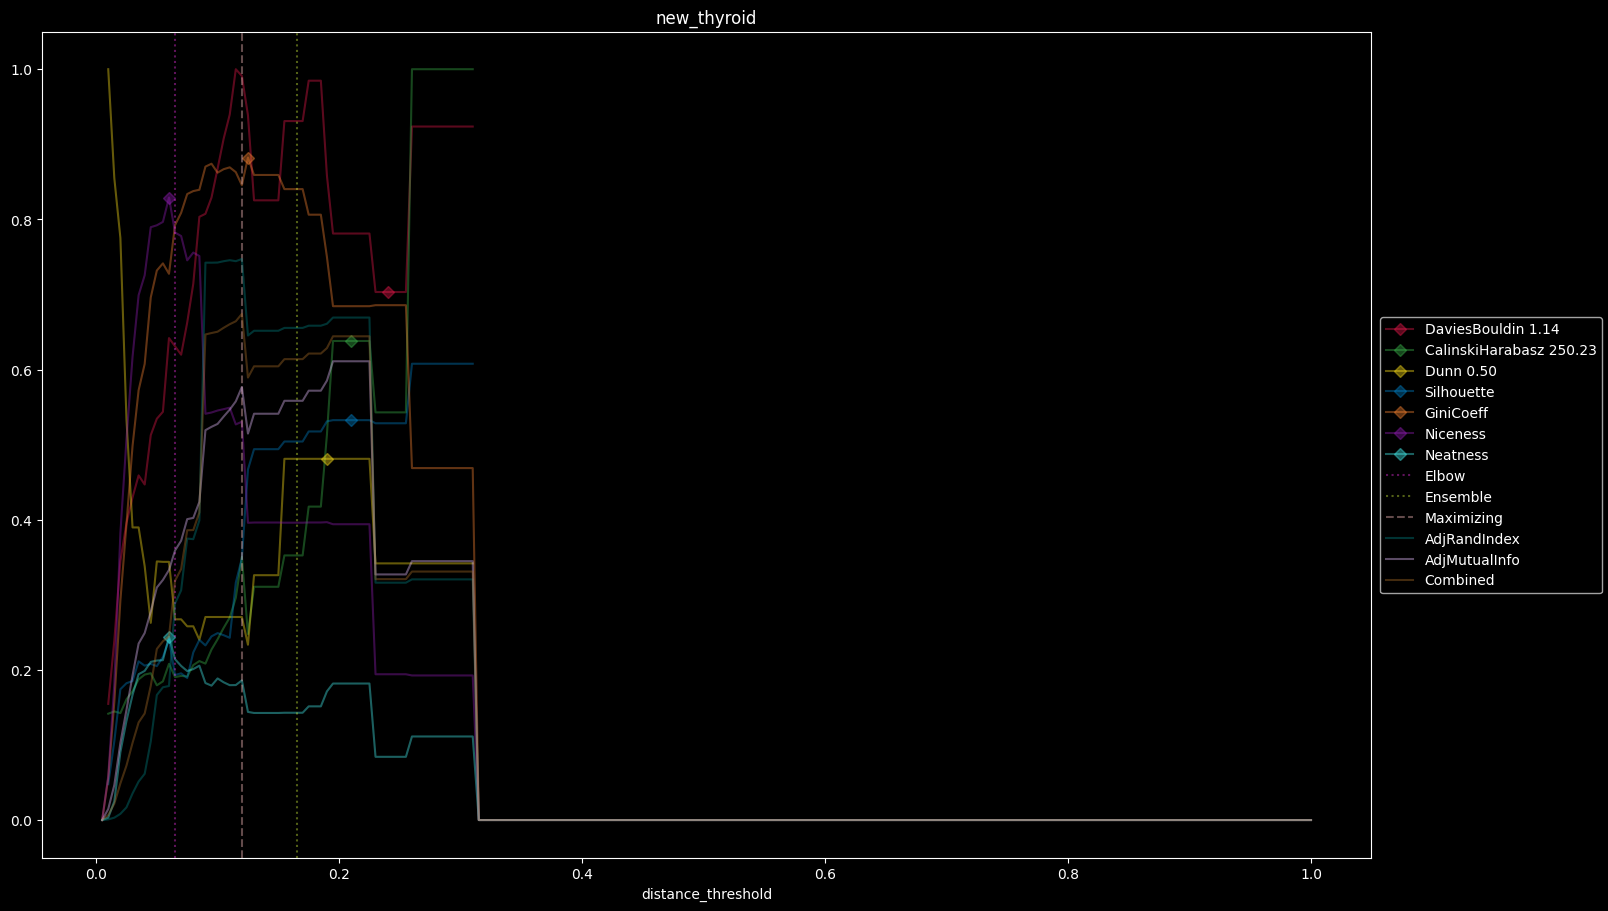

{'Silhouette': 0.3487242085898186, 'Niceness': 0.5305229485396384, 'GiniCoeff': 0.8454545454545455, 'Neatness': 0.18603263678842008, 'sample': {'distance_threshold': 0.12, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 2, 3: 2, 5: 1, 7: 1, 10: 1, 11: 1, 19: 1, 152: 1}, 'DaviesBouldin': 1.1250660532760854, 'CalinskiHarabasz': 87.6958221377228, 'Dunn': 0.1339017936171292, 'AdjRandIndex': 0.7472396095182403, 'AdjMutualInfo': 0.5766370238441718, 'Combined': 0.6741242156579252}
1    150
2     35
3     30
Name: count, dtype: int64
Dataset Summary
n   215.000000
d     5.000000
k     3.000000
e     0.821483
g     0.428571
Name: new_thyroid, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

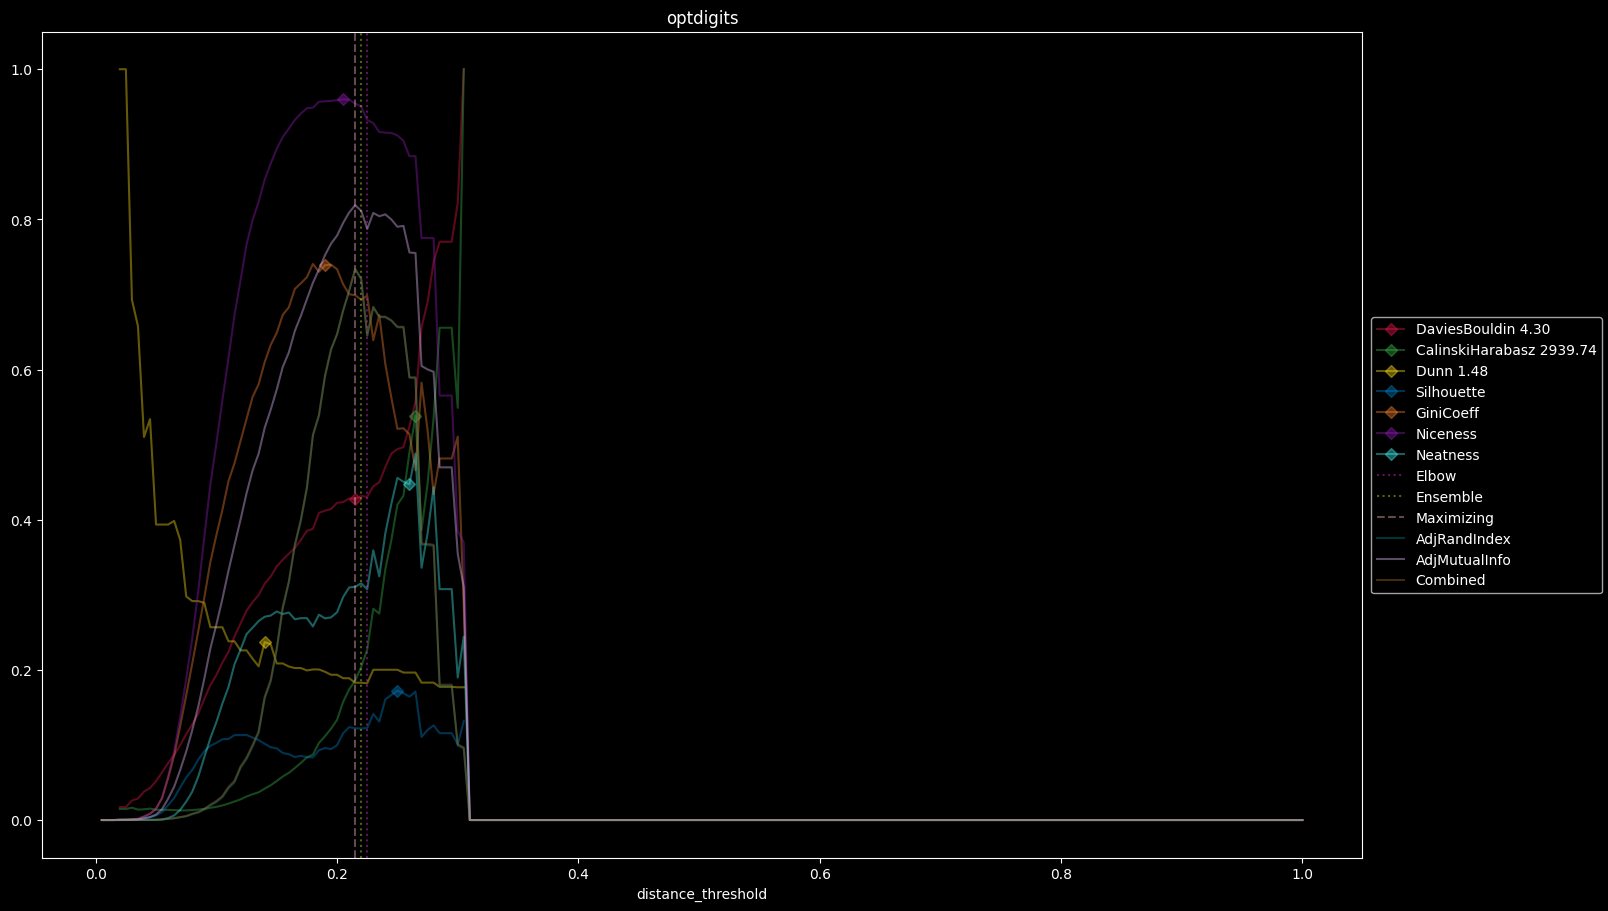

{'Silhouette': 0.12216367279511972, 'Niceness': 0.9543287526922686, 'GiniCoeff': 0.698983787094323, 'Neatness': 0.31047802757789383, 'sample': {'distance_threshold': 0.215, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 6, 2: 5, 3: 3, 4: 2, 7: 2, 10: 1, 11: 5, 15: 1, 24: 1, 27: 1, 55: 1, 56: 1, 65: 1, 73: 1, 109: 1, 123: 1, 124: 1, 137: 1, 154: 1, 164: 1, 185: 1, 187: 1, 194: 1, 196: 1}, 'DaviesBouldin': 1.8396206381068931, 'CalinskiHarabasz': 545.9154596955293, 'Dunn': 0.2704477676562035, 'AdjRandIndex': 0.73359678620109, 'AdjMutualInfo': 0.8188555268743776, 'Combined': 0.7341855294231306}
3    204
1    203
4    202
7    201
9    200
5    199
6    199
2    198
8    197
0    197
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     64.000000
k     10.000000
e      2.302518
g      0.006905
Name: optdigits, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

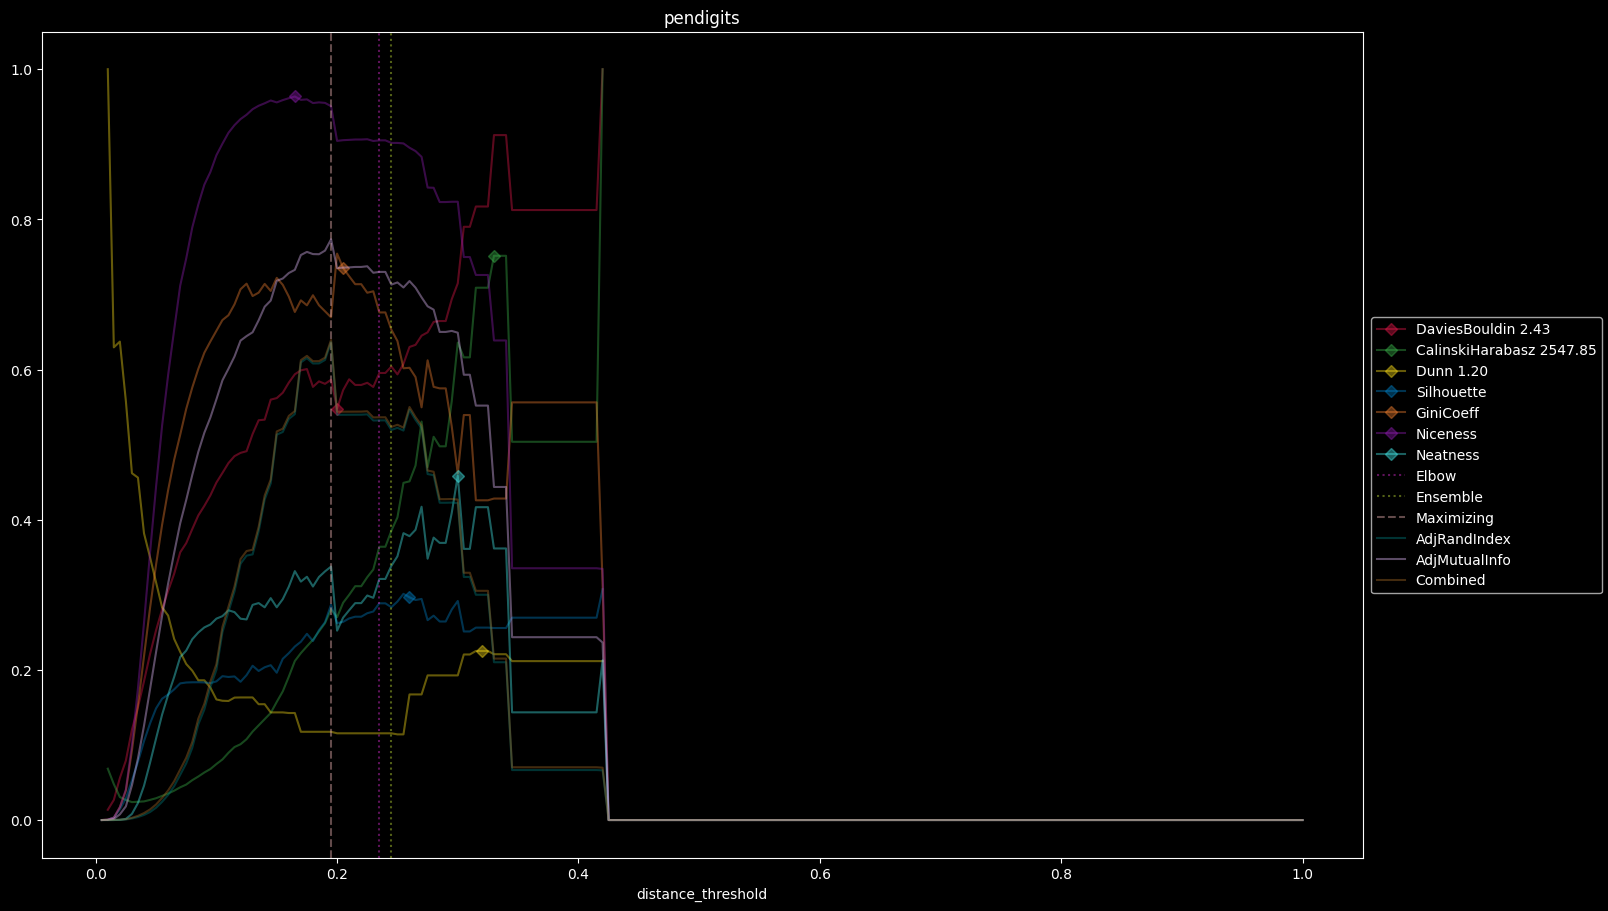

{'Silhouette': 0.28694059558578955, 'Niceness': 0.9507302705441742, 'GiniCoeff': 0.6695519314445145, 'Neatness': 0.33755239521295616, 'sample': {'distance_threshold': 0.195, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 2: 4, 3: 2, 5: 3, 7: 1, 9: 1, 10: 1, 17: 1, 18: 2, 21: 1, 22: 1, 25: 1, 27: 1, 60: 1, 65: 1, 81: 1, 86: 1, 116: 1, 117: 2, 141: 1, 153: 1, 161: 1, 192: 1, 233: 1, 272: 1}, 'DaviesBouldin': 1.42441771956133, 'CalinskiHarabasz': 715.2146649433058, 'Dunn': 0.1407121026524794, 'AdjRandIndex': 0.6365514505826687, 'AdjMutualInfo': 0.7733974768232675, 'Combined': 0.6394150037939345}
1    208
7    208
2    208
4    208
0    208
8    192
5    192
6    192
3    192
9    192
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     16.000000
k     10.000000
e      2.301785
g      0.020925
Name: pendigits, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

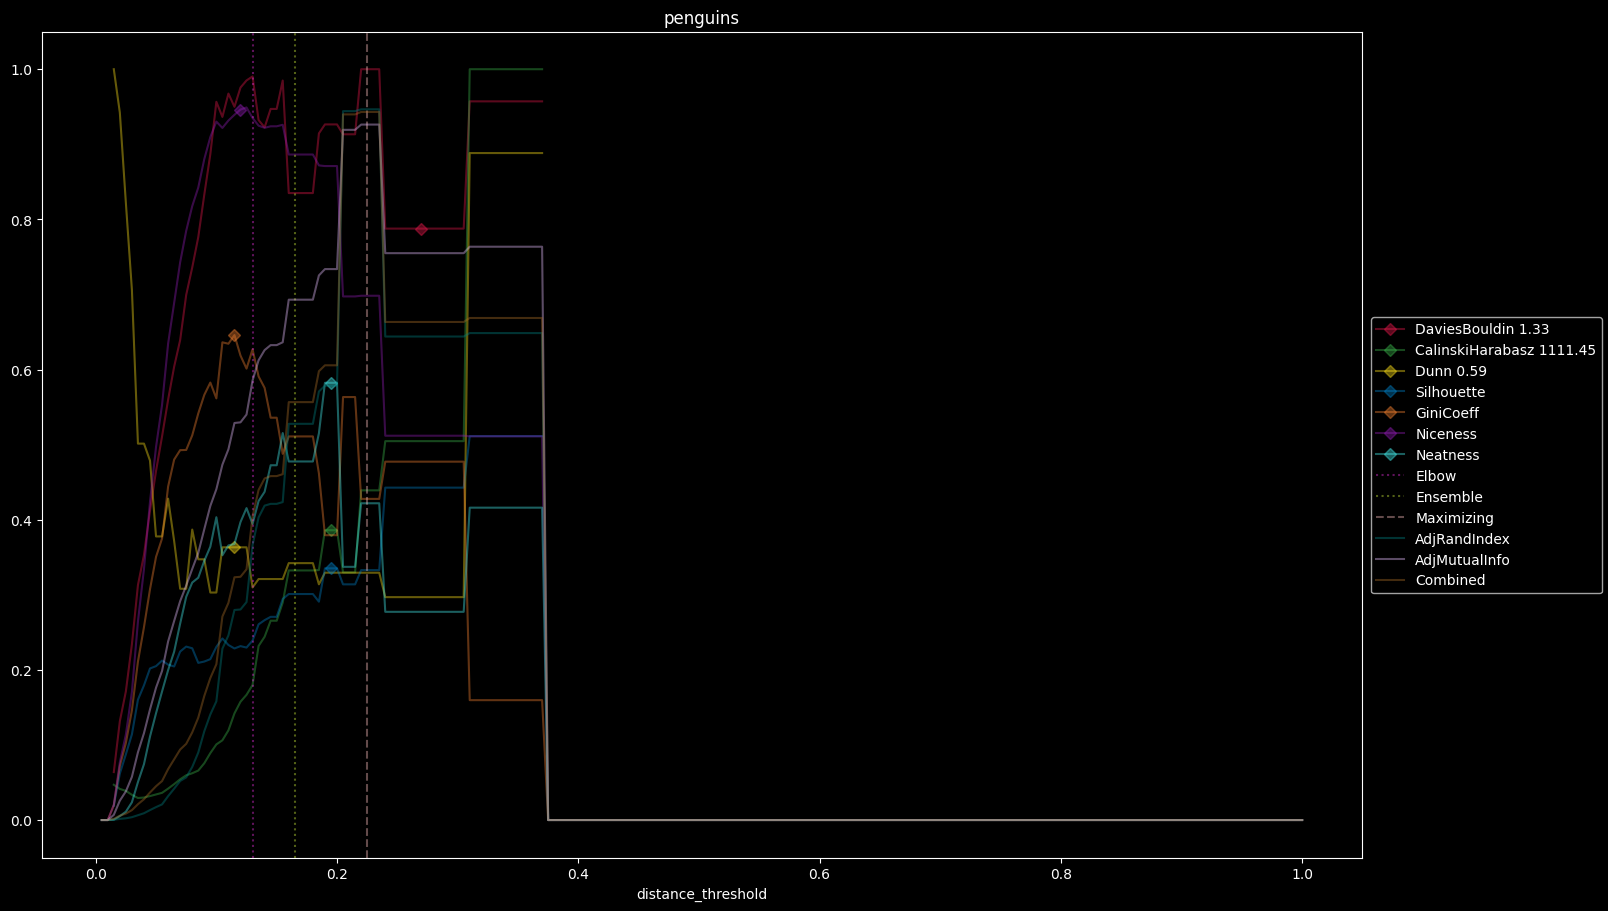

{'Silhouette': 0.3328398142200902, 'Niceness': 0.6982909573948878, 'GiniCoeff': 0.42773109243697477, 'Neatness': 0.42187556561970646, 'sample': {'distance_threshold': 0.225, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 62: 1, 118: 1, 152: 1}, 'DaviesBouldin': 1.3336445240073276, 'CalinskiHarabasz': 488.0436223866292, 'Dunn': 0.19549218895946155, 'AdjRandIndex': 0.9465809308898748, 'AdjMutualInfo': 0.9262724111768521, 'Combined': 0.9430312064358338}
0    146
2    119
1     68
Name: count, dtype: int64
Dataset Summary
n   333.000000
d     7.000000
k     3.000000
e     1.053642
g     0.174790
Name: penguins, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

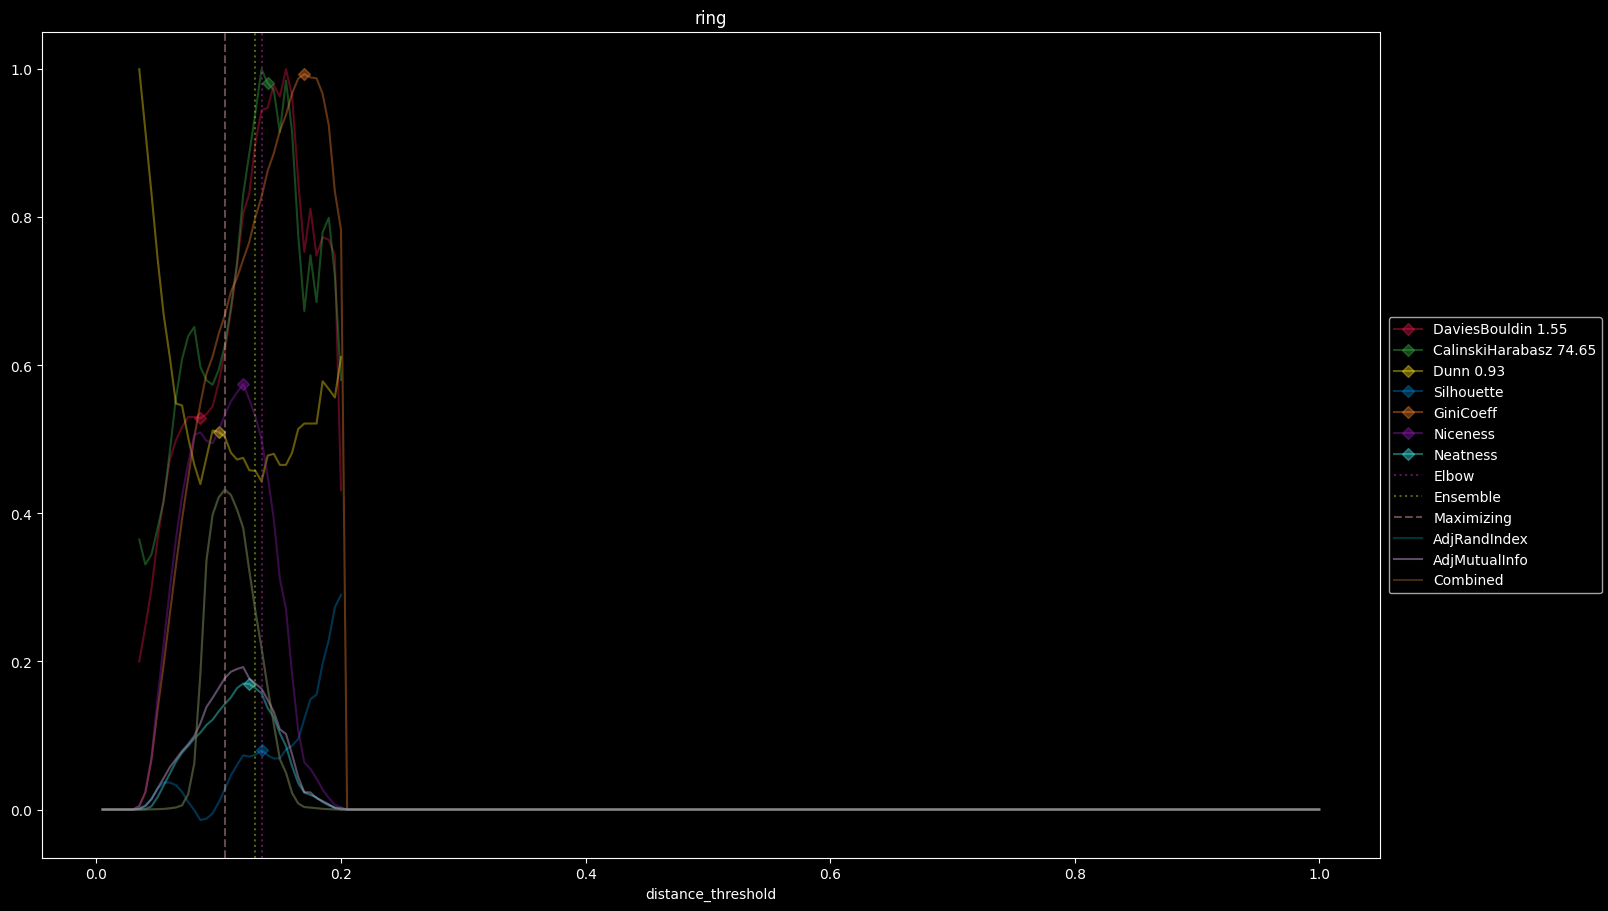

{'Silhouette': 0.027394459728237636, 'Niceness': 0.5336353149515239, 'GiniCoeff': 0.6677431431727372, 'Neatness': 0.14258373088322934, 'sample': {'distance_threshold': 0.105, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 396, 2: 155, 3: 39, 4: 23, 5: 5, 6: 4, 7: 2, 8: 1, 1014: 1}, 'DaviesBouldin': 0.9583445873878306, 'CalinskiHarabasz': 46.821252022936804, 'Dunn': 0.4690720649822736, 'AdjRandIndex': 0.43283125744284084, 'AdjMutualInfo': 0.1774474367759445, 'Combined': 0.4314952574509772}
1    1010
0     990
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693097
g      0.005231
Name: ring, dtype: float64


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

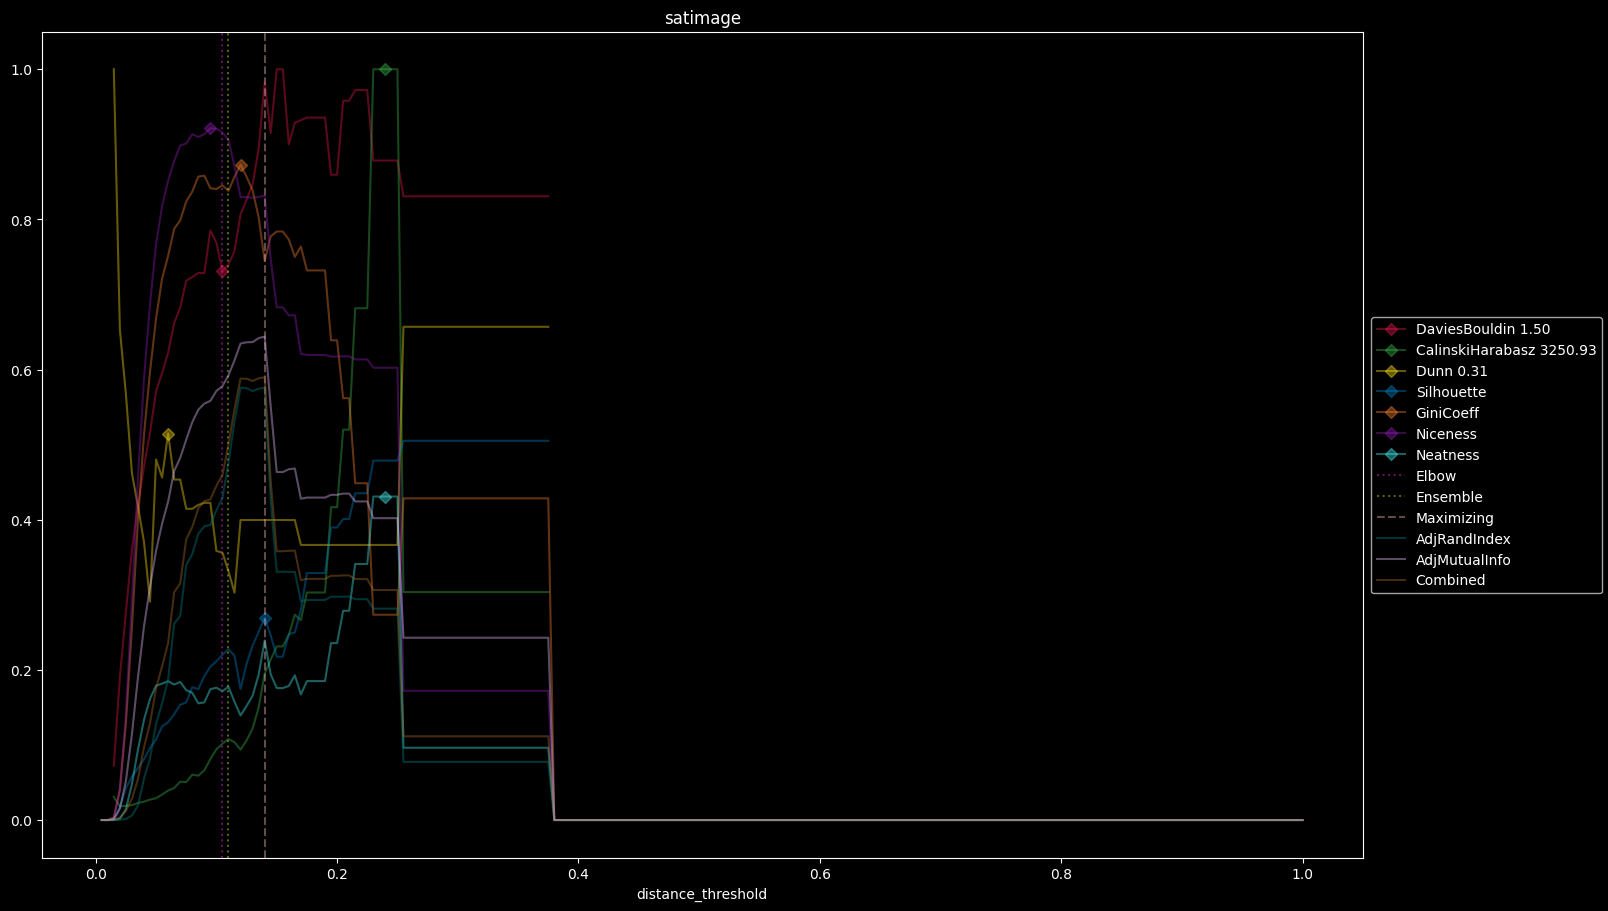

{'Silhouette': 0.2694170457295688, 'Niceness': 0.8314859384082329, 'GiniCoeff': 0.744635310529699, 'Neatness': 0.23918631658311654, 'sample': {'distance_threshold': 0.14, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 1, 5: 1, 8: 1, 10: 1, 11: 1, 12: 3, 27: 1, 122: 1, 149: 1, 211: 1, 303: 1, 537: 1, 575: 1}, 'DaviesBouldin': 1.4789003076808225, 'CalinskiHarabasz': 634.061760255477, 'Dunn': 0.12338115215385664, 'AdjRandIndex': 0.5756949511890136, 'AdjMutualInfo': 0.6438350290969574, 'Combined': 0.5897158693356145}
1    476
7    469
3    422
5    220
2    218
4    195
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     36.000000
k      6.000000
e      1.721394
g      0.205766
Name: satimage, dtype: float64


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

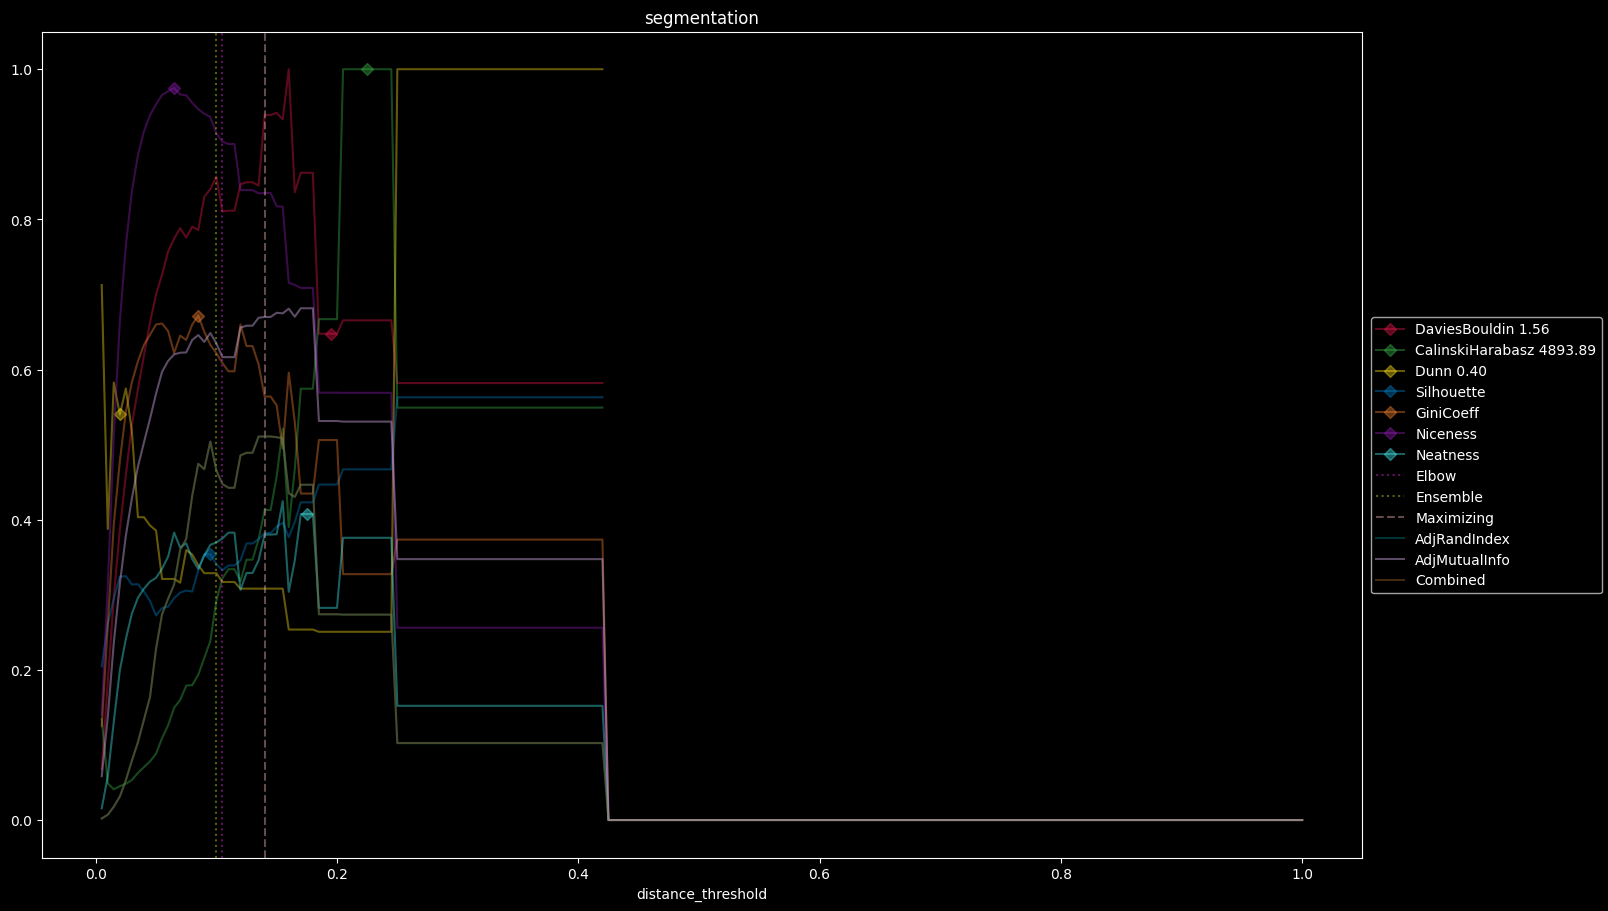

{'Silhouette': 0.38236731448158007, 'Niceness': 0.8351222283538079, 'GiniCoeff': 0.5640432457568008, 'Neatness': 0.3801081927691924, 'sample': {'distance_threshold': 0.14, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {2: 1, 6: 1, 13: 1, 34: 1, 61: 1, 252: 1, 285: 1, 303: 1, 474: 1, 570: 1}, 'DaviesBouldin': 1.4685202733927054, 'CalinskiHarabasz': 2021.1582938982103, 'Dunn': 0.12188791369767714, 'AdjRandIndex': 0.510788531732421, 'AdjMutualInfo': 0.670025972252025, 'Combined': 0.5109075353665158}
5    286
6    286
3    286
2    286
4    286
1    285
0    285
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     19.000000
k      7.000000
e      1.945909
g      0.000747
Name: segmentation, dtype: float64


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/675 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

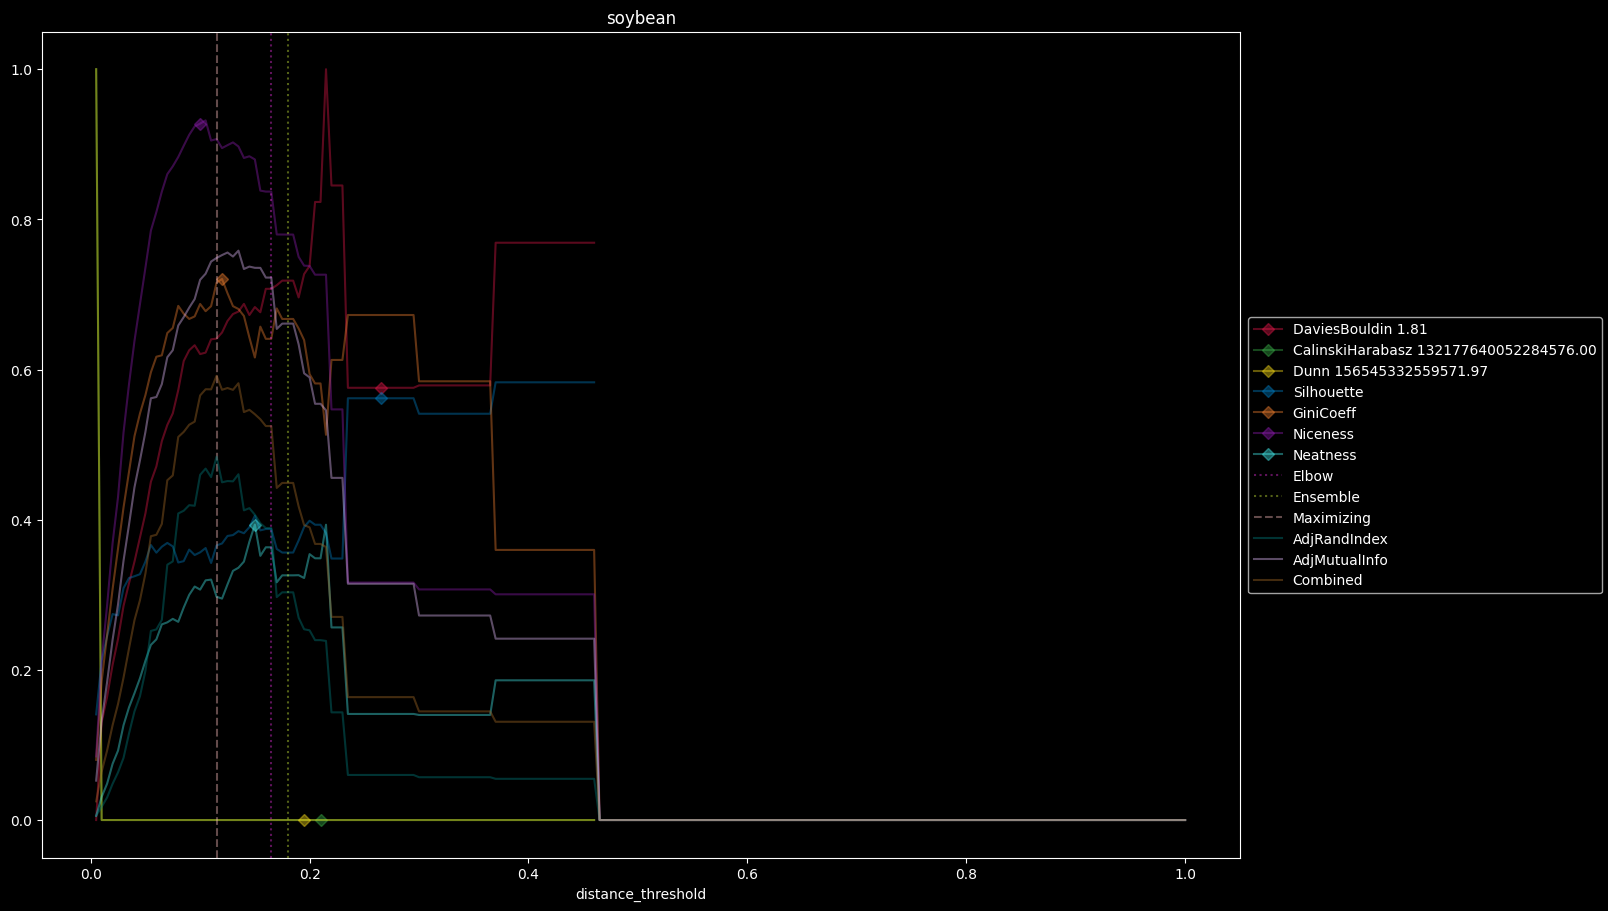

{'Silhouette': 0.3657086058905205, 'Niceness': 0.906976687749207, 'GiniCoeff': 0.7157296940347788, 'Neatness': 0.2973713263426201, 'sample': {'distance_threshold': 0.115, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 8, 2: 5, 3: 3, 4: 2, 5: 1, 6: 3, 7: 1, 8: 1, 9: 2, 11: 1, 14: 1, 15: 1, 16: 1, 20: 5, 24: 2, 31: 1, 40: 1, 59: 1, 68: 1, 182: 1}, 'DaviesBouldin': 1.1633229397833613, 'CalinskiHarabasz': 270.4763451823251, 'Dunn': 0.30821291703617026, 'AdjRandIndex': 0.4838132251747757, 'AdjMutualInfo': 0.7486103588517, 'Combined': 0.5916161685061194}
5     92
12    91
1     91
15    88
6     44
2     44
10    20
17    20
14    20
4     20
7     20
3     20
11    20
16    20
18    20
0     16
9     15
8     14
Name: count, dtype: int64
Dataset Summary
n   675.000000
d    35.000000
k    18.000000
e     2.625593
g     0.407115
Name: soybean, dtype: float64


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

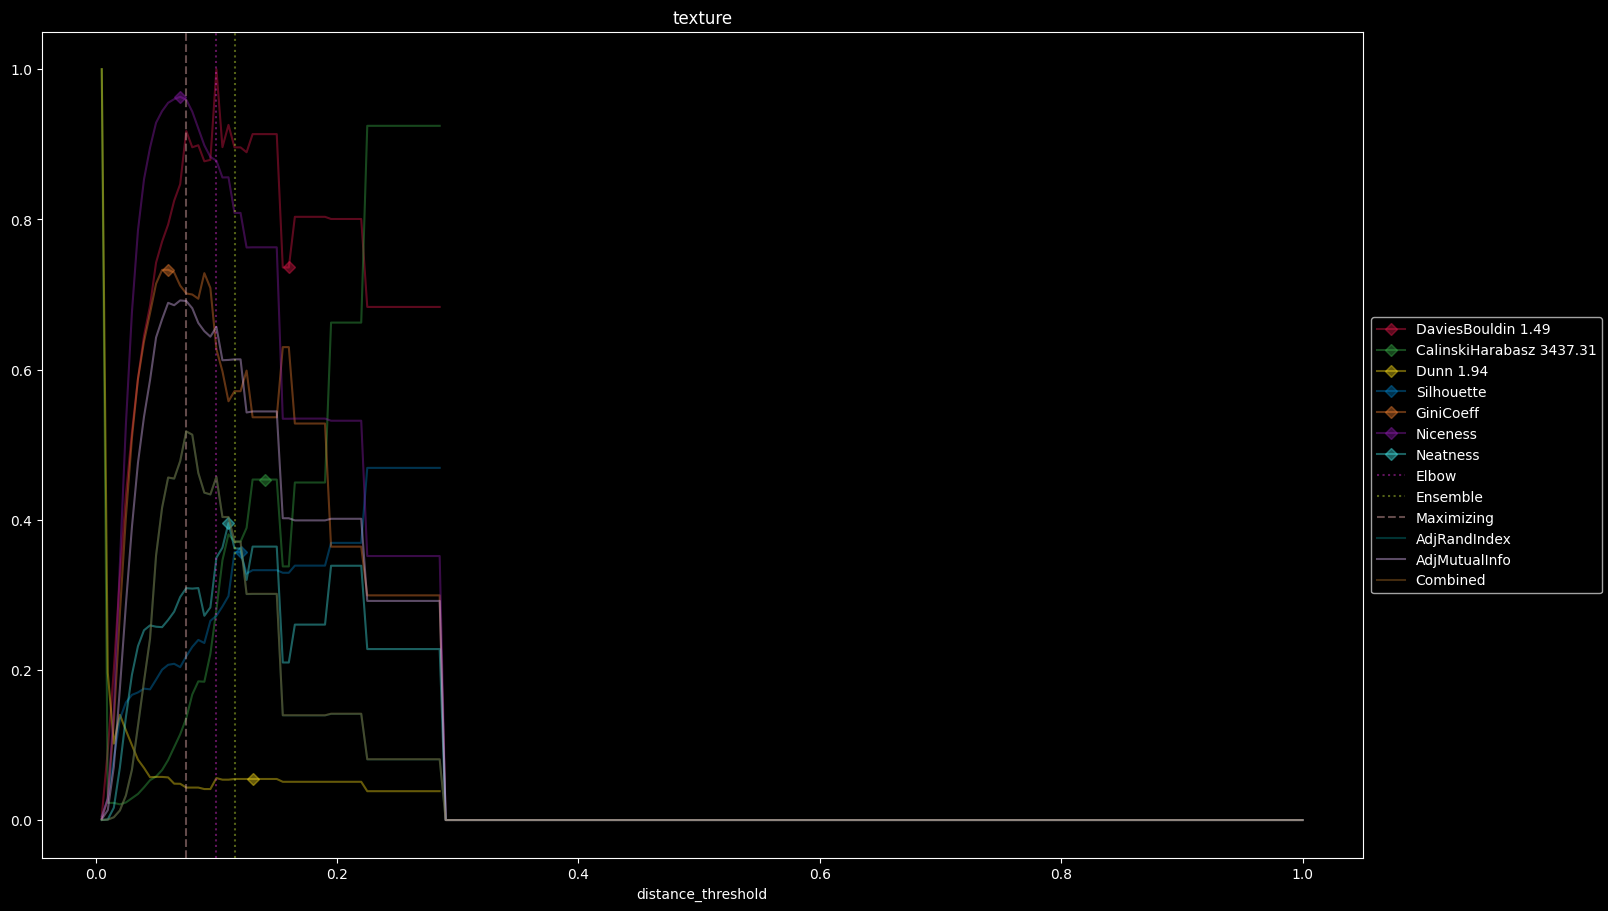

{'Silhouette': 0.21798527641483204, 'Niceness': 0.9594132217694266, 'GiniCoeff': 0.701370320855615, 'Neatness': 0.3088053023673145, 'sample': {'distance_threshold': 0.075, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 7, 2: 4, 3: 4, 4: 2, 5: 1, 6: 3, 7: 3, 9: 1, 11: 1, 13: 1, 14: 1, 16: 1, 19: 1, 25: 2, 35: 1, 38: 1, 48: 1, 77: 1, 92: 1, 93: 1, 103: 1, 106: 1, 112: 1, 113: 1, 117: 1, 125: 1, 167: 1, 169: 1, 181: 1, 213: 1}, 'DaviesBouldin': 1.3665737214585476, 'CalinskiHarabasz': 466.09632634342574, 'Dunn': 0.0840116380455279, 'AdjRandIndex': 0.5175222769733951, 'AdjMutualInfo': 0.6912242284647552, 'Combined': 0.5176709723938132}
6     182
13    182
12    182
4     182
9     182
7     182
3     182
10    182
14    182
8     181
2     181
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     40.000000
k     11.000000
e      2.397893
g      0.000856
Name: texture, dtype: float64


  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/959 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

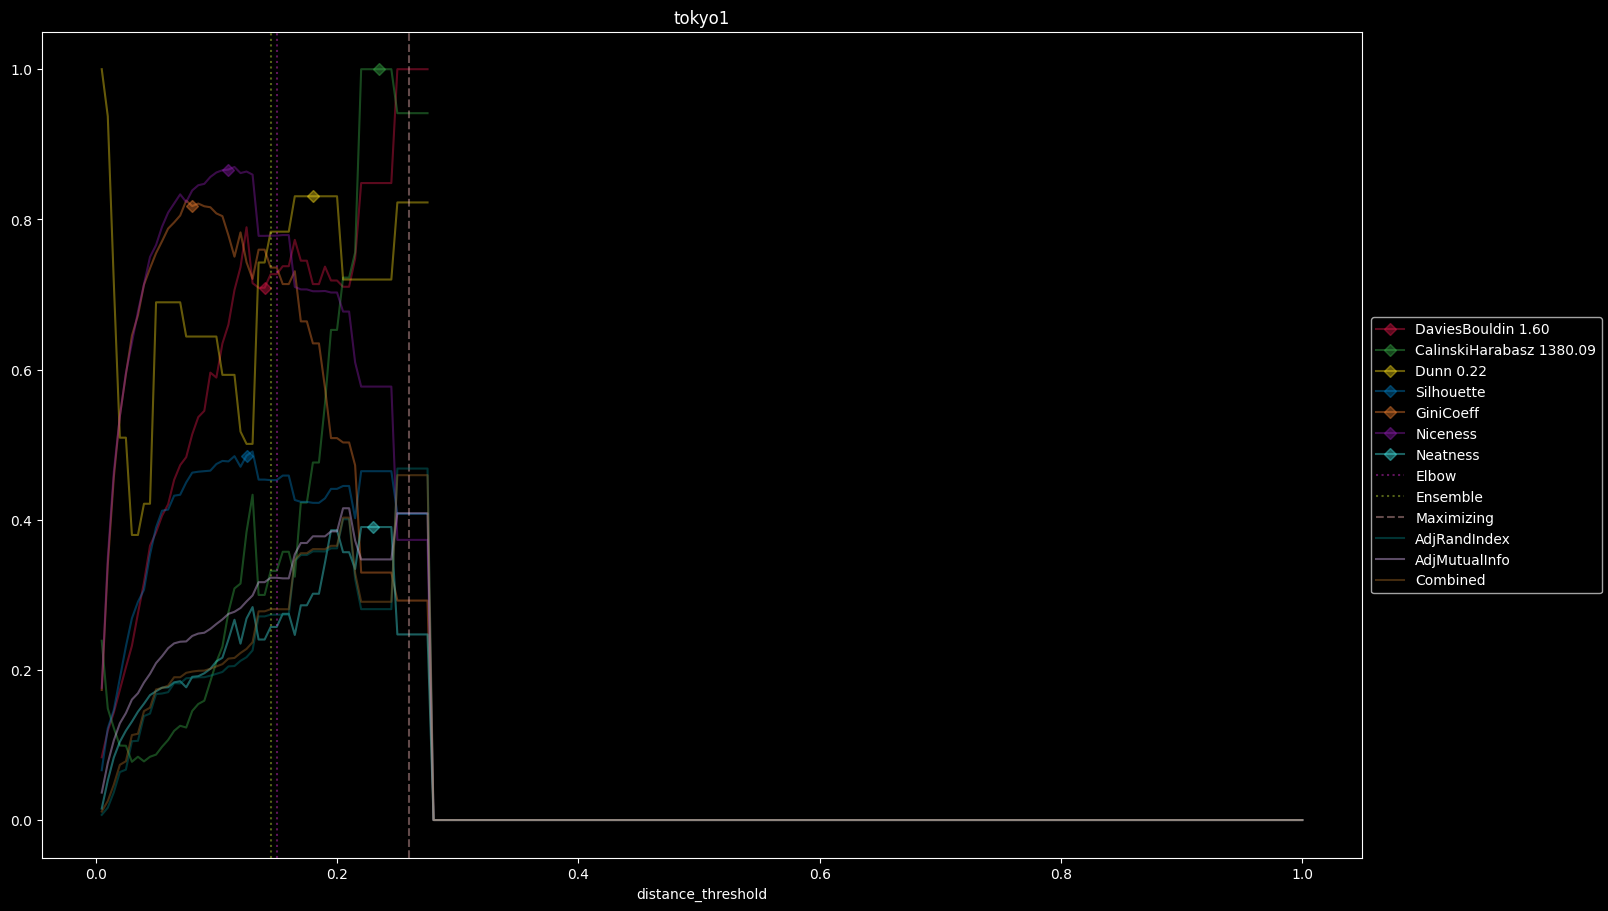

{'Silhouette': 0.4078333297685654, 'Niceness': 0.37313134542006177, 'GiniCoeff': 0.29229525862068967, 'Neatness': 0.2472083968844234, 'sample': {'distance_threshold': 0.26, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {217: 1, 742: 1}, 'DaviesBouldin': 1.598376451051455, 'CalinskiHarabasz': 1299.2609864788458, 'Dunn': 0.17959271793193785, 'AdjRandIndex': 0.46813161453635177, 'AdjMutualInfo': 0.4086319445671108, 'Combined': 0.4592868090705578}
1    613
0    346
Name: count, dtype: int64
Dataset Summary
n   959.000000
d    44.000000
k     2.000000
e     0.653873
g     0.148653
Name: tokyo1, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

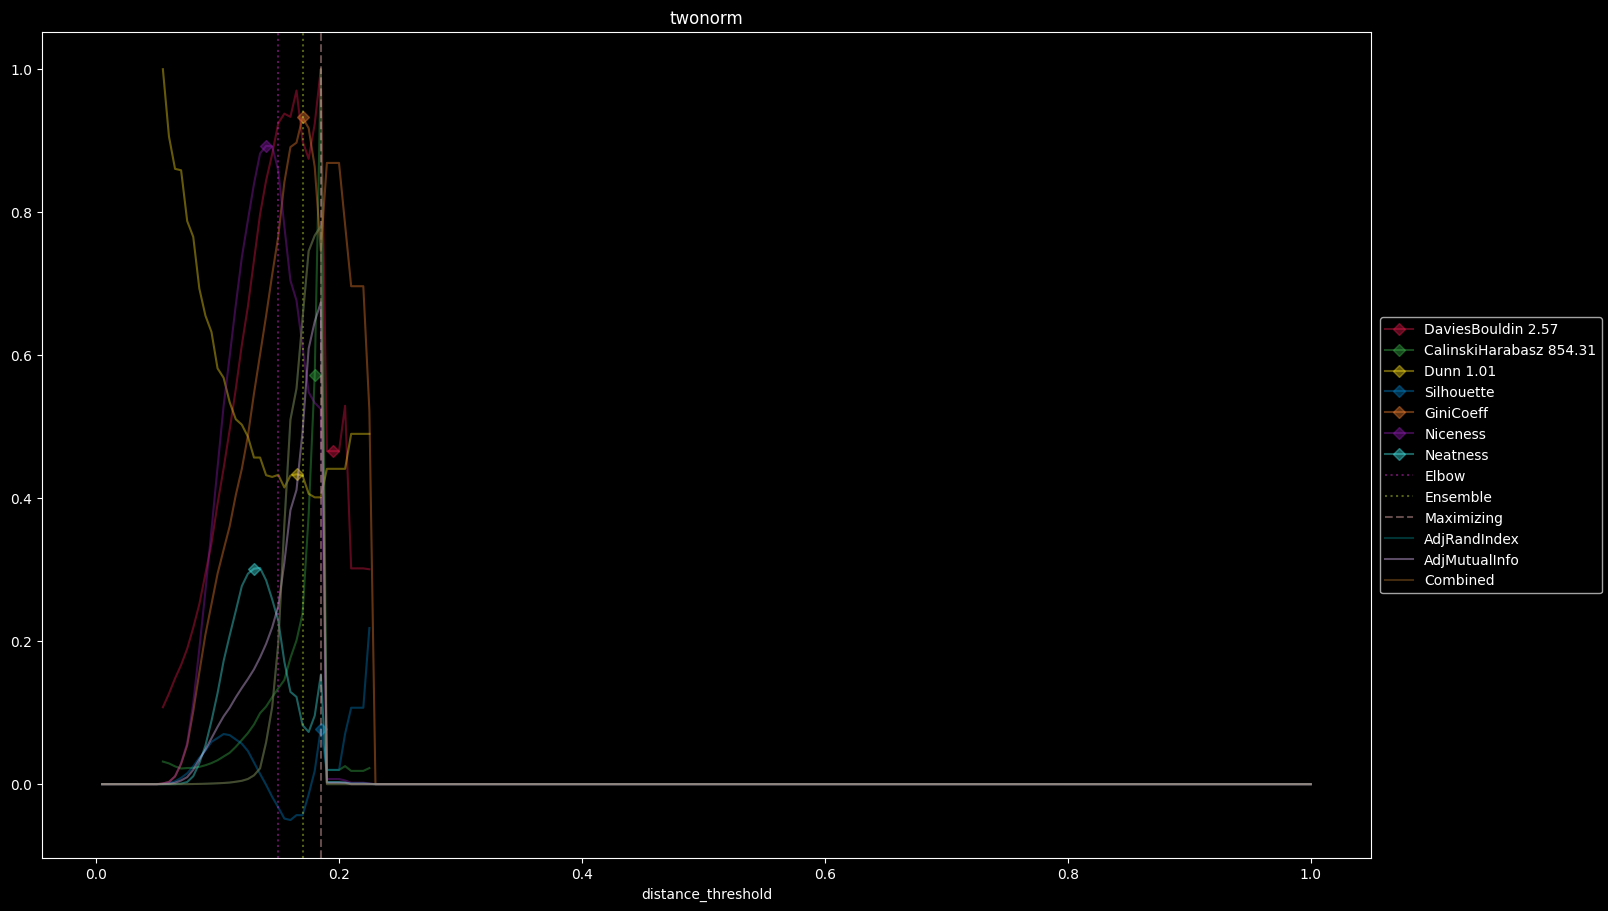

{'Silhouette': 0.0775023137169547, 'Niceness': 0.5248969767402777, 'GiniCoeff': 0.7456903710100641, 'Neatness': 0.152600750560932, 'sample': {'distance_threshold': 0.185, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 3: 1, 987: 1, 1006: 1}, 'DaviesBouldin': 2.5666555779103493, 'CalinskiHarabasz': 854.3146879093432, 'Dunn': 0.40603495003051276, 'AdjRandIndex': 0.7804794296940456, 'AdjMutualInfo': 0.673834694478911, 'Combined': 0.7804236401906198}
0    1001
1     999
Name: count, dtype: int64
Dataset Summary
n   2000.000000
d     20.000000
k      2.000000
e      0.693147
g      0.000523
Name: twonorm, dtype: float64


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

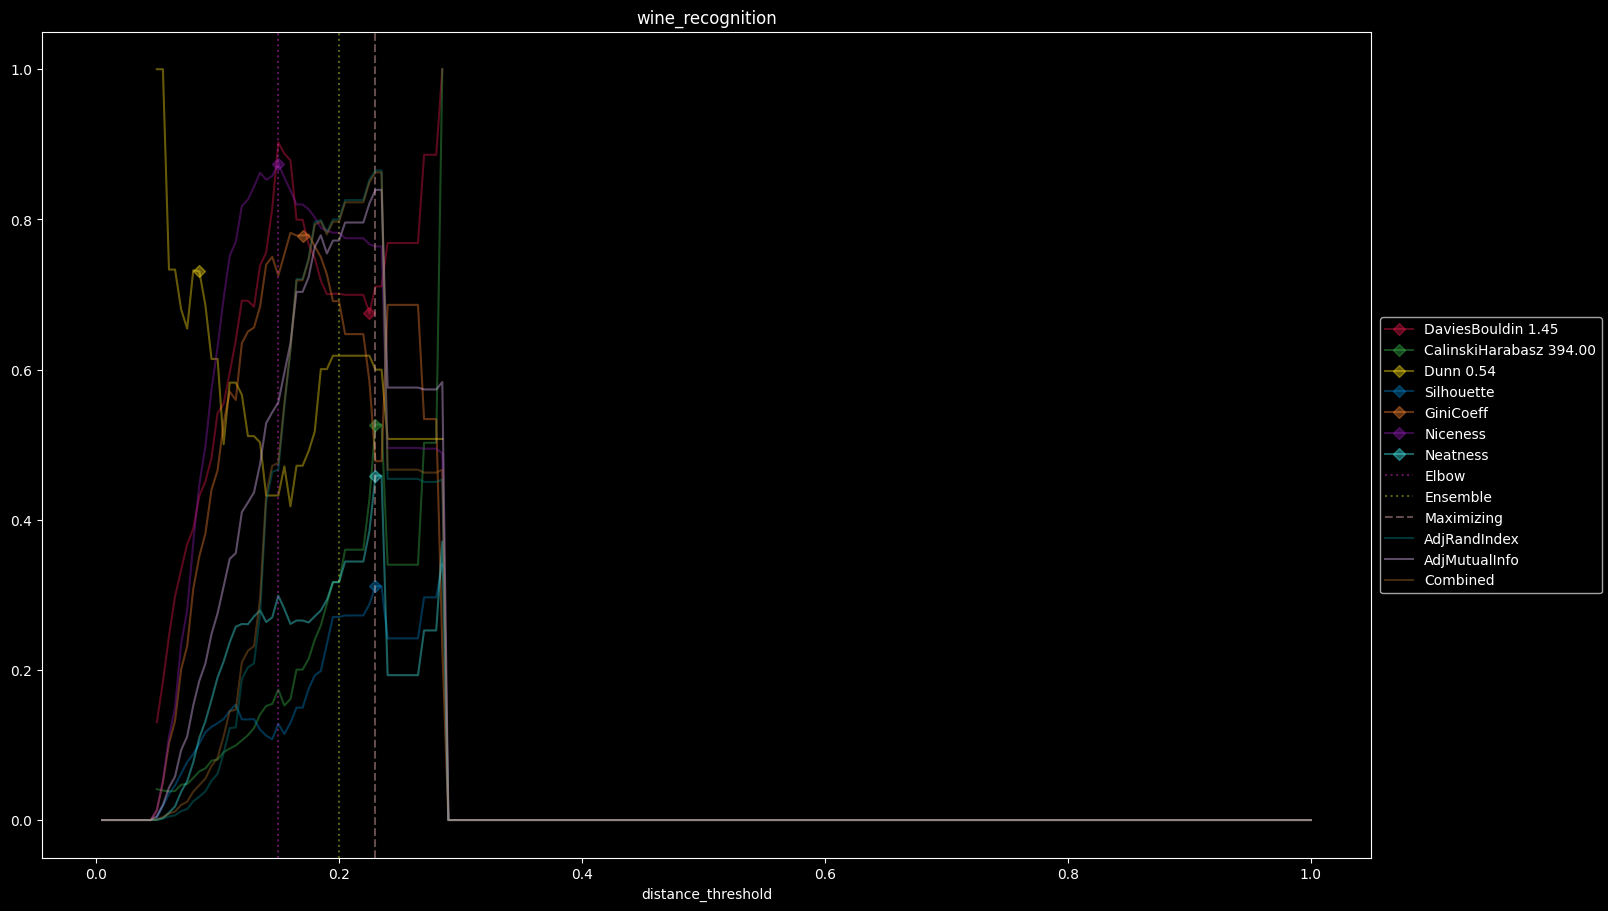

{'Silhouette': 0.3115524014498681, 'Niceness': 0.7639555174228954, 'GiniCoeff': 0.477979797979798, 'Neatness': 0.45874794703543353, 'sample': {'distance_threshold': 0.23, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 53: 1, 61: 1, 62: 1}, 'DaviesBouldin': 1.0332821878296703, 'CalinskiHarabasz': 207.5470918496055, 'Dunn': 0.3235339555455477, 'AdjRandIndex': 0.8651168482162414, 'AdjMutualInfo': 0.8393073258750644, 'Combined': 0.862518515832399}
2    71
1    59
3    48
Name: count, dtype: int64
Dataset Summary
n   178.000000
d    13.000000
k     3.000000
e     1.086038
g     0.100673
Name: wine_recognition, dtype: float64


In [2]:
# https://github.com/EpistasisLab/pmlb/issues/167
# deprecated = [
#     "cmc",
#     "195_auto_price",
#     "207_autoPrice",
#     "glass",
#     "heart_c",
#     "cleve",
#     "cleveland_nominal",
#     "heart_statlog",
#     "heart_h",
#     "colic",
#     "vote",
#     "wdbc",
#     "australian",
#     "buggyCrx",
#     "crx",
#     "breast_w",
#     "pima",
#     "german",
#     "flare",
#     "car_evaluation",
#     "kr_vs_kp",
#     "294_satellite_image",
#     "197_cpu_act",
#     "227_cpu_small",
#     "562_cpu_small",
#     "1595_poker",
# ]

classification_dataset_names = [
    "agaricus_lepiota",
    "analcatdata_authorship",
    "breast",
    "breast_cancer_wisconsin",
    "collins",
    "confidence",
    "dermatology",
    "ecoli",
    "house_votes_84",
    "iris",
    "kddcup",
    "mfeat_factors",
    "mfeat_fourier",
    "mfeat_karhunen",
    "mfeat_morphological",
    "mfeat_pixel",
    "new_thyroid",
    "optdigits",
    "pendigits",
    "penguins",
    "ring",
    "satimage",
    "segmentation",
    "soybean",
    "texture",
    "tokyo1",
    'twonorm',
    "wine_recognition",
]

max_size = 2000

max_muti = 0
max_rand = 0
max_combo = 0
results = 0
ranks = 0
d = {}
r = {}

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(
        classification_dataset, return_X_y=True, local_cache_dir="/Users/temp/pmlb_data"
    )
    if len(X) > max_size:
        _, X, _, y = train_test_split(X, y, test_size=max_size, random_state=42, stratify=y)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    if X.shape[1] > 2:
        vis = pd.DataFrame(
            umap.UMAP(random_state=42).fit_transform(X), columns=list("ab"), index=X.index
        )
    elif X.shape[1] == 2:
        vis = X.copy()
        vis.columns = list("ab")
    else:
        vis = X.copy()
        vis.columns = ["a"]
        vis["b"] = 0.0
    kwargs = dict(
        df=X,
        title=f"{classification_dataset}",
        actual=y,
    )
    if "precomputed" in inspect.getfullargspec(optimize).args:
        kwargs["precomputed"] = True
        kwargs["chunksize"] = 20
    clusters, (score, res) = optimize(**kwargs)
    # print(res)
    # plt.title(f"{classification_dataset} - Actual")
    # scatterplot(vis, x="a", y="b", hue=y, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    # plt.title(f"{classification_dataset} - Best Possible Prediction")
    # scatterplot(vis, x="a", y="b", hue=clusters, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    rank = res.rank(ascending=False)
    max_muti += res.max_muti
    max_rand += res.max_rand
    max_combo += res.max_combo
    results += res
    ranks += rank
    res = res.Combined
    res["n"], res["d"] = X.shape
    res["k"] = len(np.unique(y))
    _, counts = np.unique(y, return_counts=True)
    res["e"] = entropy(counts)
    res["g"] = gini_coefficient(counts)
    res.name = classification_dataset
    d[classification_dataset] = res
    res.index.name = "Dataset Summary"
    print(res[["n", "d", "k", "e", "g"]])
    res.index.name = "Metric"
    rank = rank.Combined
    rank["n"], rank["d"], rank["k"], rank["e"], rank["g"] = res[["n", "d", "k", "e", "g"]]
    r[classification_dataset] = rank

denom = len(classification_dataset_names)

max_muti /= denom
max_rand /= denom
max_combo /= denom
results /= denom
ranks /= denom
df = pd.DataFrame(d).T
df_rank = pd.DataFrame(r).T

# Results

In [3]:
print("Average Mutual Information:", max_muti)
print("Average Rand Index:", max_rand)
print("Average Combined:", max_combo)

Average Mutual Information: 0.6796705121938037
Average Rand Index: 0.6488345455229328
Average Combined: 0.6486852614314988


### Results across all datasets
- Averages per metric broken down by Mutual Information, Rand Index, and Combined
- Summary statistics
- Correlation matrix
- Mann-Whitney U test

### Raw Scores

In [4]:
results

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    0.000000      0.000000  0.000000
DaviesBouldin          0.500081      0.418108  0.419547
CalinskiHarabasz       0.510472      0.446434  0.452217
Dunn                   0.484989      0.393456  0.399849
Silhouette             0.593874      0.509778  0.512508
GiniCoeff              0.539774      0.450976  0.455036
Niceness               0.541840      0.409187  0.424280
Neatness               0.574188      0.458016  0.468865
Elbow                  0.562492      0.463966  0.472690
Ensemble               0.615478      0.549871  0.554250

In [5]:
df.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    0.000000       0.419547          0.452217  0.399849    0.512508   
std     0.000000       0.254854          0.277034  0.247652    0.244363   
min     0.000000       0.000002          0.000063  0.000199    0.049997   
25%     0.000000       0.219333          0.259011  0.221583    0.326384   
50%     0.000000       0.459667          0.479192  0.364802    0.585928   
75%     0.000000       0.610296          0.658857  0.600512    0.697979   
max     0.000000       0.937141          0.909557  0.963614    0.909557   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     0.455036  0.424280  0.468865  0.472690  0.554250 1225.142857   
std      0.207823  0.186503  0.239939  0.151268  0.175147  810.794430   
min      0.003386  0.058755  0.012396  0.197072  0.267577   72.000000   
25%      0.329379  0.321436  0.302439  0.346949  0.444757  417.750000   
50%      0.502422  0.440122  0.436742  0.469040  0.550176 1479.500000   
75%      0.588334  0.547161  0.622747  0.604579  0.693652 2000.000000   
max      0.781553  0.817644  0.909557  0.694967  0.960302 2000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543482  0.143445  
std     56.517486  4.307462  0.716043  0.193266  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000392  
50%     22.500000  6.000000  1.545430  0.060799  
75%     41.750000 10.000000  2.302585  0.222515  
max    240.000000 18.000000  2.625593  0.817516

In [6]:
df.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.642058  0.126238    0.632037   
CalinskiHarabasz  NaN       0.642058          1.000000  0.448587    0.622843   
Dunn              NaN       0.126238          0.448587  1.000000    0.179430   
Silhouette        NaN       0.632037          0.622843  0.179430    1.000000   
GiniCoeff         NaN       0.573240          0.750628  0.165740    0.638500   
Niceness          NaN       0.282131         -0.037650  0.162849    0.108360   
Neatness          NaN       0.719764          0.358852  0.187130    0.503539   
Elbow             NaN       0.428095          0.072251  0.211754    0.248744   
Ensemble          NaN       0.589500          0.529221  0.440431    0.702404   
n                 NaN      -0.490825         -0.570925 -0.231087   -0.169491   
d                 NaN      -0.080081         -0.475126 -0.185869    0.164084   
k                 NaN      -0.247365         -0.454398 -0.187544   -0.281463   
e                 NaN      -0.218268         -0.596309 -0.326486   -0.297313   
g                 NaN       0.325922          0.504729  0.494985    0.355376   

Metric            GiniCoeff  Niceness  Neatness     Elbow  Ensemble         n  \
Metric                                                                          
BIC                     NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin      0.573240  0.282131  0.719764  0.428095  0.589500 -0.490825   
CalinskiHarabasz   0.750628 -0.037650  0.358852  0.072251  0.529221 -0.570925   
Dunn               0.165740  0.162849  0.187130  0.211754  0.440431 -0.231087   
Silhouette         0.638500  0.108360  0.503539  0.248744  0.702404 -0.169491   
GiniCoeff          1.000000  0.222835  0.389727  0.368944  0.542513 -0.365001   
Niceness           0.222835  1.000000  0.567053  0.804360  0.442228  0.080796   
Neatness           0.389727  0.567053  1.000000  0.579366  0.670940 -0.270037   
Elbow              0.368944  0.804360  0.579366  1.000000  0.617302 -0.061944   
Ensemble           0.542513  0.442228  0.670940  0.617302  1.000000 -0.179613   
n                 -0.365001  0.080796 -0.270037 -0.061944 -0.179613  1.000000   
d                 -0.267273  0.232205  0.254243  0.355855  0.232386  0.405125   
k                 -0.033208  0.579212  0.132603  0.405032 -0.005323  0.337582   
e                 -0.154222  0.509717  0.069921  0.406265 -0.024937  0.354914   
g                  0.494052  0.273625  0.393340  0.201622  0.353055 -0.310765   

Metric                   d         k         e         g  
Metric                                                    
BIC                    NaN       NaN       NaN       NaN  
DaviesBouldin    -0.080081 -0.247365 -0.218268  0.325922  
CalinskiHarabasz -0.475126 -0.454398 -0.596309  0.504729  
Dunn             -0.185869 -0.187544 -0.326486  0.494985  
Silhouette        0.164084 -0.281463 -0.297313  0.355376  
GiniCoeff        -0.267273 -0.033208 -0.154222  0.494052  
Niceness          0.232205  0.579212  0.509717  0.273625  
Neatness          0.254243  0.132603  0.069921  0.393340  
Elbow             0.355855  0.405032  0.406265  0.201622  
Ensemble          0.232386 -0.005323 -0.024937  0.353055  
n                 0.405125  0.337582  0.354914 -0.310765  
d                 1.000000  0.337486  0.395907 -0.185876  
k                 0.337486  1.000000  0.893365  0.153414  
e                 0.395907  0.893365  1.000000 -0.188385  
g                -0.185876  0.153414 -0.188385  1.000000

In [7]:
columns = df.columns[:-5]
pd.DataFrame([[mannwhitneyu(df[x], df[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)

Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.571832 0.793172   
CalinskiHarabasz 0.000000       0.571832          1.000000 0.491282   
Dunn             0.000000       0.793172          0.491282 1.000000   
Silhouette       0.000000       0.146979          0.389546 0.088332   
GiniCoeff        0.000000       0.481016          0.902184 0.286802   
Niceness         0.000000       0.980390          0.640476 0.517451   
Neatness         0.000000       0.455908          0.812150 0.305735   
Elbow            0.000000       0.426736          0.902184 0.158749   
Ensemble         0.000000       0.035223          0.171196 0.013043   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 0.000000  0.000000  
DaviesBouldin       0.146979   0.481016  0.980390  0.455908 0.426736  0.035223  
CalinskiHarabasz    0.389546   0.902184  0.640476  0.812150 0.902184  0.171196  
Dunn                0.088332   0.286802  0.517451  0.305735 0.158749  0.013043  
Silhouette          1.000000   0.209990  0.115681  0.475892 0.333624  0.712330  
GiniCoeff           0.209990   1.000000  0.354521  0.902185 0.915171  0.129561  
Niceness            0.115681   0.354521  1.000000  0.594317 0.321472  0.016000  
Neatness            0.475892   0.902185  0.594317  1.000000 0.889222  0.173789  
Elbow               0.333624   0.915171  0.321472  0.889222 1.000000  0.083832  
Ensemble            0.712330   0.129561  0.016000  0.173789 0.083832  1.000000

### Ranks

In [8]:
ranks

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                   10.000000     10.000000 10.000000
DaviesBouldin          5.535714      5.642857  5.607143
CalinskiHarabasz       5.267857      5.160714  5.125000
Dunn                   6.017857      5.803571  5.875000
Silhouette             4.232143      4.089286  4.053571
GiniCoeff              5.464286      5.357143  5.392857
Niceness               5.321429      5.250000  5.285714
Neatness               4.482143      4.839286  4.803571
Elbow                  5.035714      5.107143  5.107143
Ensemble               3.642857      3.750000  3.750000

In [9]:
df_rank.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean   10.000000       5.607143          5.125000  5.875000    4.053571   
std     0.000000       2.532592          2.866231  3.005011    2.705753   
min    10.000000       1.000000          1.000000  1.000000    1.000000   
25%    10.000000       4.000000          2.000000  3.000000    1.500000   
50%    10.000000       5.500000          5.000000  6.500000    3.500000   
75%    10.000000       7.500000          8.000000  9.000000    6.000000   
max    10.000000       9.000000          9.000000  9.000000    9.000000   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     5.392857  5.285714  4.803571  5.107143  3.750000 1225.142857   
std      2.334750  2.826556  2.632909  1.959578  1.280191  810.794430   
min      1.000000  1.000000  1.500000  1.000000  1.000000   72.000000   
25%      3.375000  2.000000  2.375000  4.000000  3.000000  417.750000   
50%      5.500000  6.000000  4.500000  5.000000  4.000000 1479.500000   
75%      7.125000  8.000000  7.000000  6.625000  5.000000 2000.000000   
max      9.000000  9.000000  9.000000  8.000000  6.000000 2000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543482  0.143445  
std     56.517486  4.307462  0.716043  0.193266  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000392  
50%     22.500000  6.000000  1.545430  0.060799  
75%     41.750000 10.000000  2.302585  0.222515  
max    240.000000 18.000000  2.625593  0.817516

In [10]:
df_rank.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.068242 -0.349786    0.084258   
CalinskiHarabasz  NaN       0.068242          1.000000  0.206136    0.019401   
Dunn              NaN      -0.349786          0.206136  1.000000   -0.355586   
Silhouette        NaN       0.084258          0.019401 -0.355586    1.000000   
GiniCoeff         NaN      -0.196859         -0.056038 -0.379426    0.019996   
Niceness          NaN      -0.201041         -0.688025 -0.222384   -0.419761   
Neatness          NaN      -0.060602         -0.065335  0.125514   -0.058256   
Elbow             NaN      -0.315841         -0.450879 -0.356152   -0.264818   
Ensemble          NaN      -0.077108         -0.452955  0.104700   -0.073510   
n                 NaN       0.328001          0.546322 -0.038239   -0.060696   
d                 NaN       0.078393          0.444552  0.057163   -0.188614   
k                 NaN       0.140532          0.660348  0.229980    0.302515   
e                 NaN      -0.006707          0.829813  0.343536    0.195011   
g                 NaN       0.048323         -0.352413 -0.207951   -0.029687   

Metric            GiniCoeff  Niceness  Neatness     Elbow  Ensemble         n  \
Metric                                                                          
BIC                     NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin     -0.196859 -0.201041 -0.060602 -0.315841 -0.077108  0.328001   
CalinskiHarabasz  -0.056038 -0.688025 -0.065335 -0.450879 -0.452955  0.546322   
Dunn              -0.379426 -0.222384  0.125514 -0.356152  0.104700 -0.038239   
Silhouette         0.019996 -0.419761 -0.058256 -0.264818 -0.073510 -0.060696   
GiniCoeff          1.000000  0.190015 -0.565386  0.294033 -0.167284 -0.109048   
Niceness           0.190015  1.000000 -0.121574  0.576017  0.161207 -0.395082   
Neatness          -0.565386 -0.121574  1.000000 -0.295475 -0.210149  0.068224   
Elbow              0.294033  0.576017 -0.295475  1.000000  0.298967 -0.254241   
Ensemble          -0.167284  0.161207 -0.210149  0.298967  1.000000 -0.333967   
n                 -0.109048 -0.395082  0.068224 -0.254241 -0.333967  1.000000   
d                  0.295988 -0.042759 -0.339996 -0.139130 -0.419112  0.405125   
k                 -0.257399 -0.691400 -0.135702 -0.322977 -0.166232  0.337582   
e                 -0.220073 -0.698565 -0.055636 -0.438518 -0.333769  0.354914   
g                  0.057768  0.244161 -0.175986  0.455680  0.264287 -0.310765   

Metric                   d         k         e         g  
Metric                                                    
BIC                    NaN       NaN       NaN       NaN  
DaviesBouldin     0.078393  0.140532 -0.006707  0.048323  
CalinskiHarabasz  0.444552  0.660348  0.829813 -0.352413  
Dunn              0.057163  0.229980  0.343536 -0.207951  
Silhouette       -0.188614  0.302515  0.195011 -0.029687  
GiniCoeff         0.295988 -0.257399 -0.220073  0.057768  
Niceness         -0.042759 -0.691400 -0.698565  0.244161  
Neatness         -0.339996 -0.135702 -0.055636 -0.175986  
Elbow            -0.139130 -0.322977 -0.438518  0.455680  
Ensemble         -0.419112 -0.166232 -0.333769  0.264287  
n                 0.405125  0.337582  0.354914 -0.310765  
d                 1.000000  0.337486  0.395907 -0.185876  
k                 0.337486  1.000000  0.893365  0.153414  
e                 0.395907  0.893365  1.000000 -0.188385  
g                -0.185876  0.153414 -0.188385  1.000000

In [11]:
pd.DataFrame([[mannwhitneyu(df_rank[x], df_rank[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)


Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.633164 0.546869   
CalinskiHarabasz 0.000000       0.633164          1.000000 0.238278   
Dunn             0.000000       0.546869          0.238278 1.000000   
Silhouette       0.000000       0.045447          0.132121 0.017229   
GiniCoeff        0.000000       0.650652          0.760957 0.405086   
Niceness         0.000000       0.785932          0.934390 0.276270   
Neatness         0.000000       0.239365          0.773234 0.136068   
Elbow            0.000000       0.365228          0.779777 0.164567   
Ensemble         0.000000       0.002307          0.127000 0.008747   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 0.000000  0.000000  
DaviesBouldin       0.045447   0.650652  0.785932  0.239365 0.365228  0.002307  
CalinskiHarabasz    0.132121   0.760957  0.934390  0.773234 0.779777  0.127000  
Dunn                0.017229   0.405086  0.276270  0.136068 0.164567  0.008747  
Silhouette          1.000000   0.043031  0.101208  0.202060 0.099971  0.993413  
GiniCoeff           0.043031   1.000000  0.960639  0.331441 0.680792  0.006882  
Niceness            0.101208   0.960639  1.000000  0.645076 0.537116  0.024927  
Neatness            0.202060   0.331441  0.645076  1.000000 0.633340  0.286320  
Elbow               0.099971   0.680792  0.537116  0.633340 1.000000  0.005260  
Ensemble            0.993413   0.006882  0.024927  0.286320 0.005260  1.000000